In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime
import importlib


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/gj341/'
stispath = '{}stis/'.format(path)
cospath = '{}cos/'.format(path)

In [3]:
x1ds = np.hstack((glob.glob('{}*0_x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path))))#, glob.glob('{}*x1dsum.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/gj341/oeoo05010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/gj341/oeoo05020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/gj341/oeoo05030_sx1.fits'],
      dtype='<U65')

/media/david/2tb_ext_hd/hddata/meats/hst/gj341/oeoo05010_x1d.fits
G140M
[168.32626]


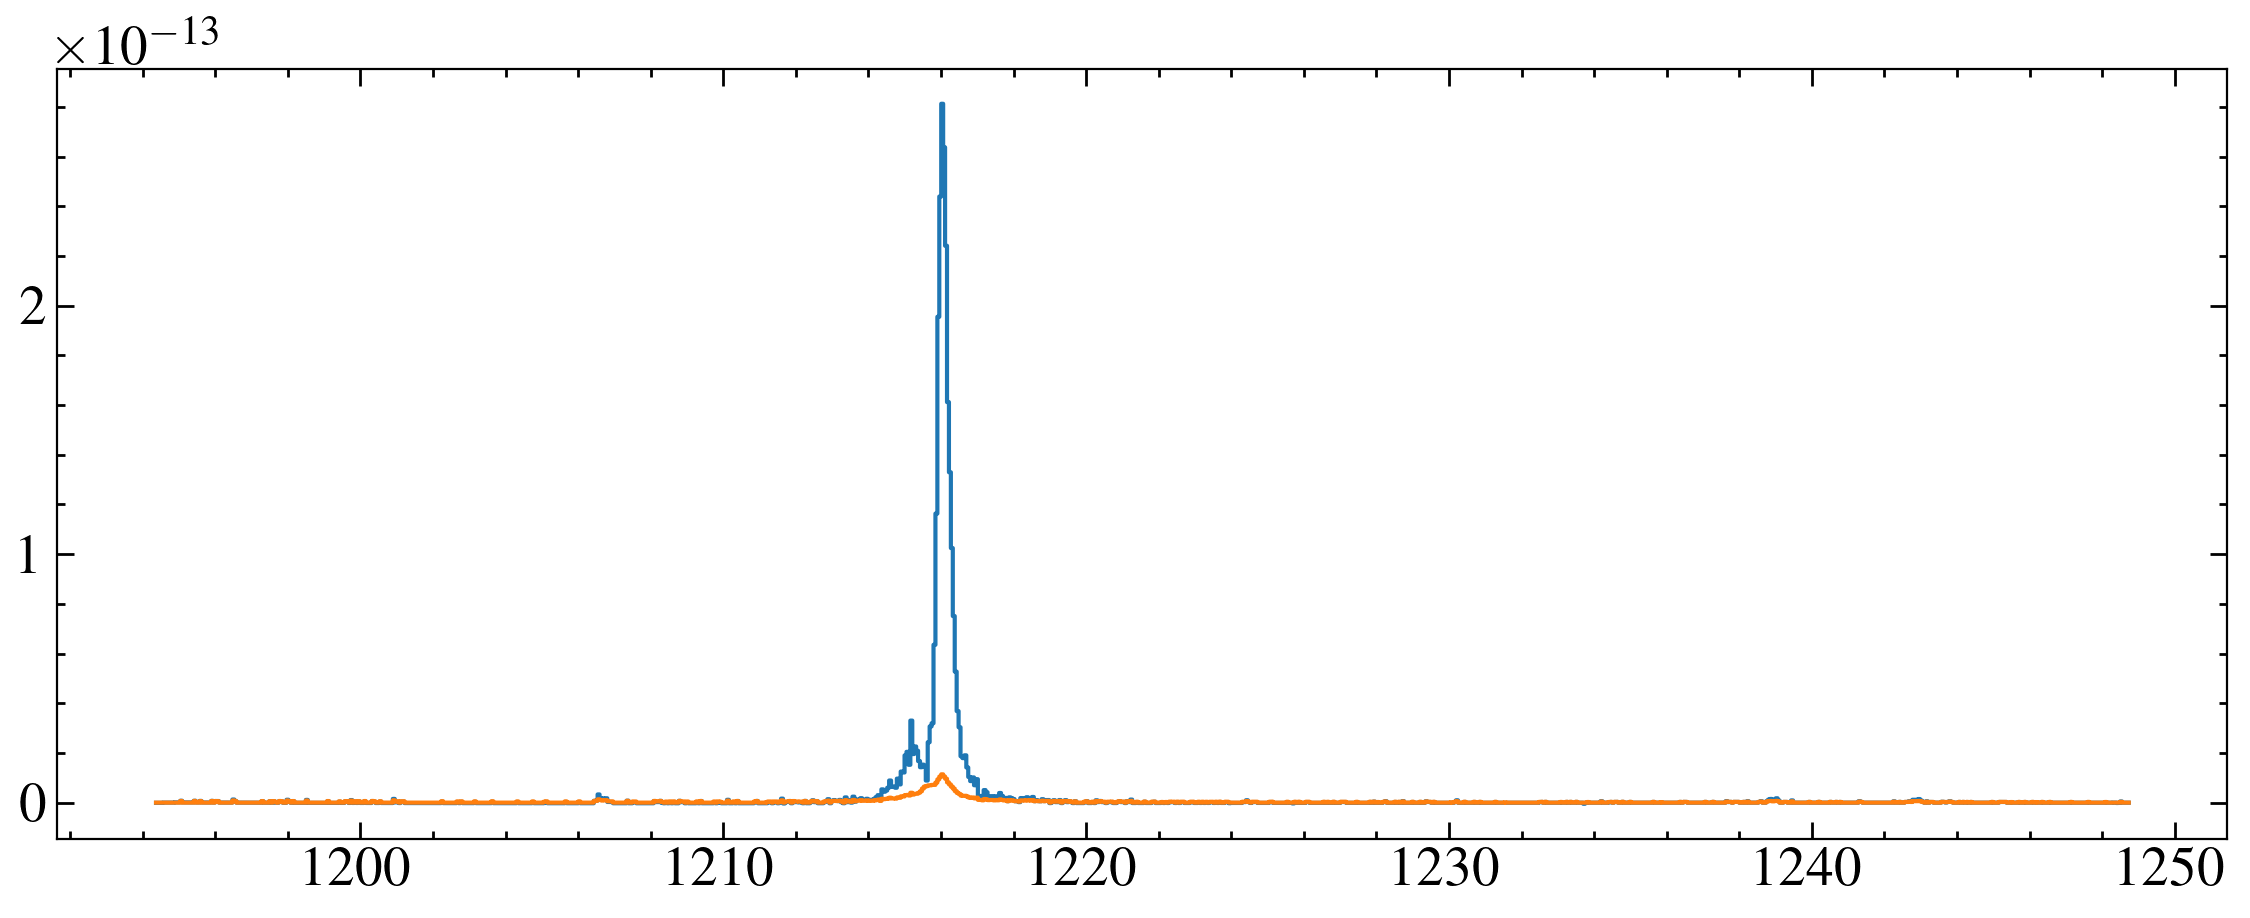

/media/david/2tb_ext_hd/hddata/meats/hst/gj341/oeoo05020_x1d.fits
G230L
[527.6192]


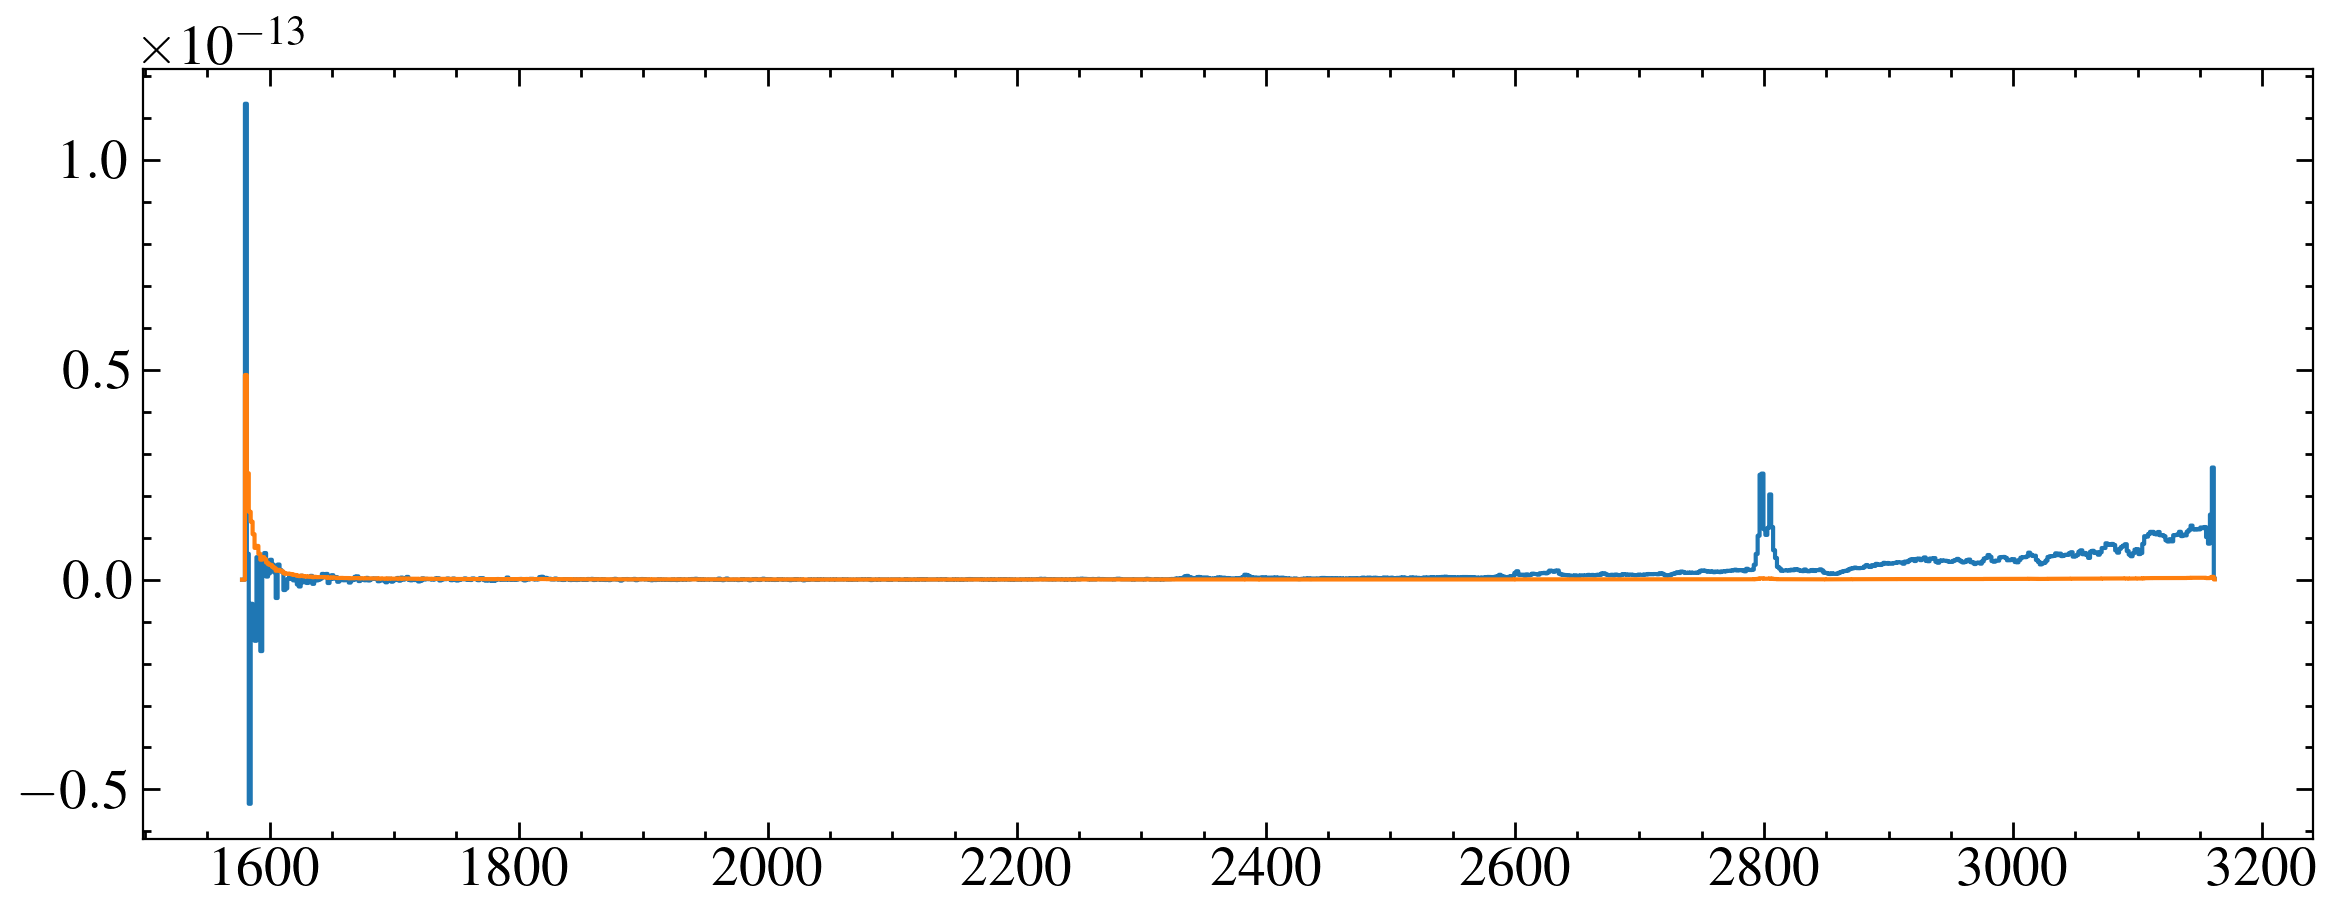

/media/david/2tb_ext_hd/hddata/meats/hst/gj341/oeoo05030_sx1.fits
G430L
[894.6254]


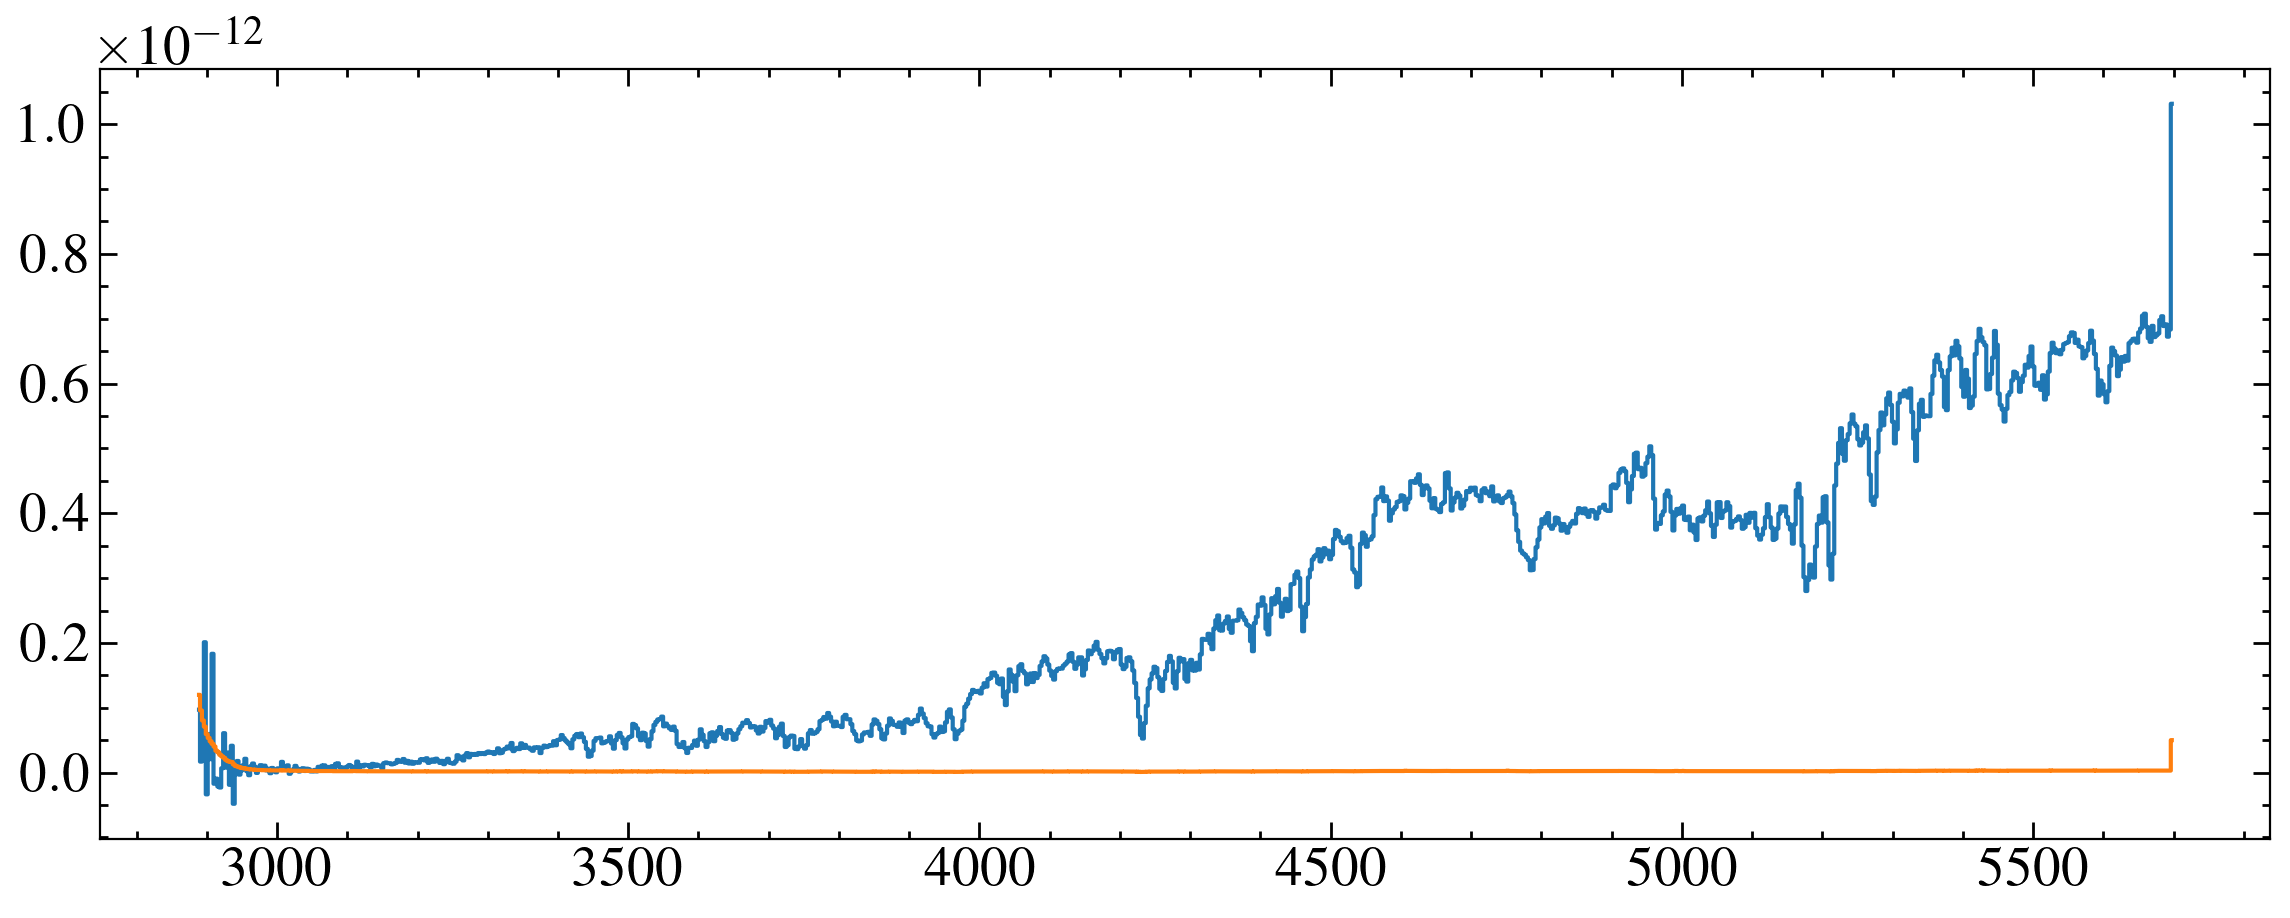

In [4]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1')
    plt.show()

    

/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/astropy/stats/funcs.py:698: RuntimeWarning: invalid value encountered in sqrt
  [n + 0.5 - np.sqrt(n + 0.25), n + 0.5 + np.sqrt(n + 0.25)]


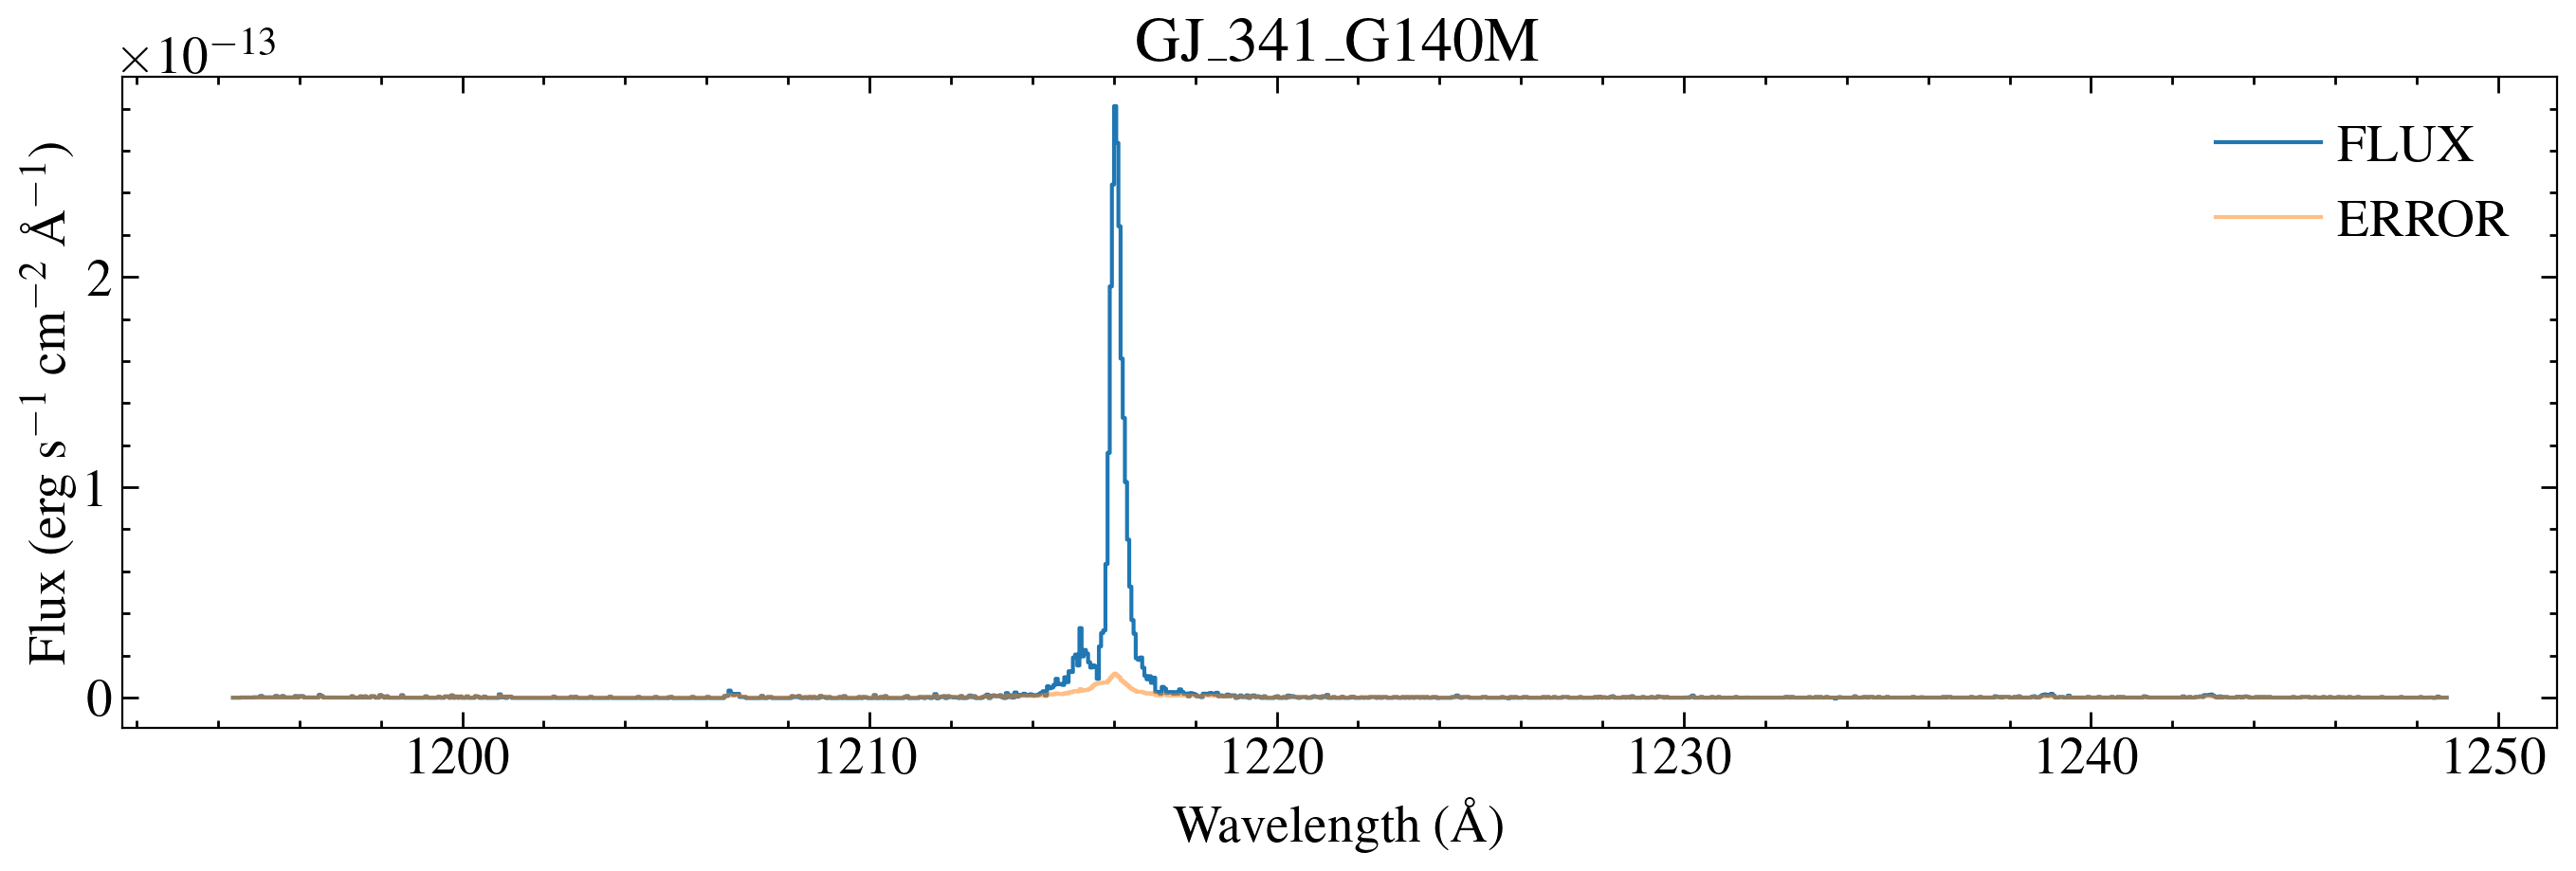

Spectrum saved as hlsp_muscles_hst_stis_gj_341_g140m_v1_component-spec.fits


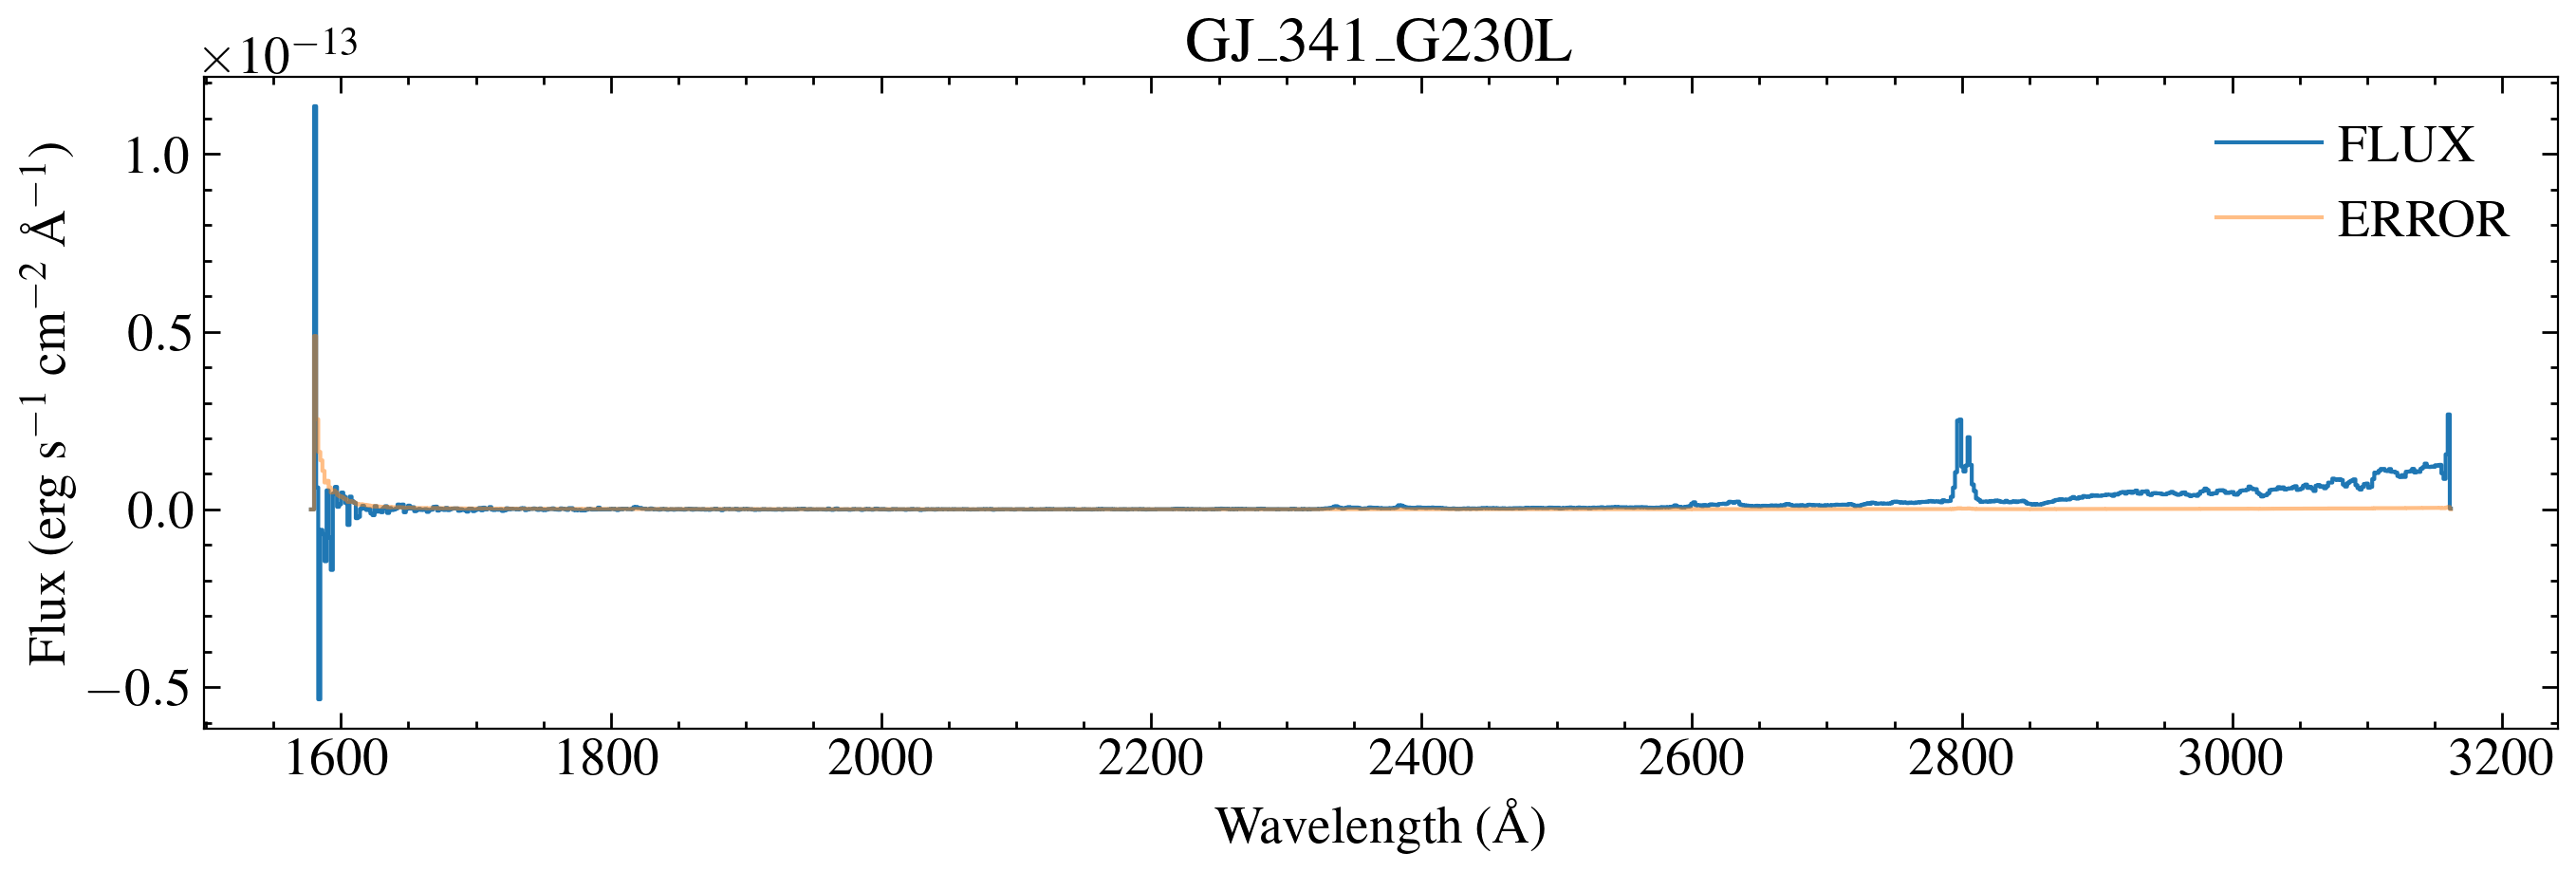

Spectrum saved as hlsp_muscles_hst_stis_gj_341_g230l_v1_component-spec.fits


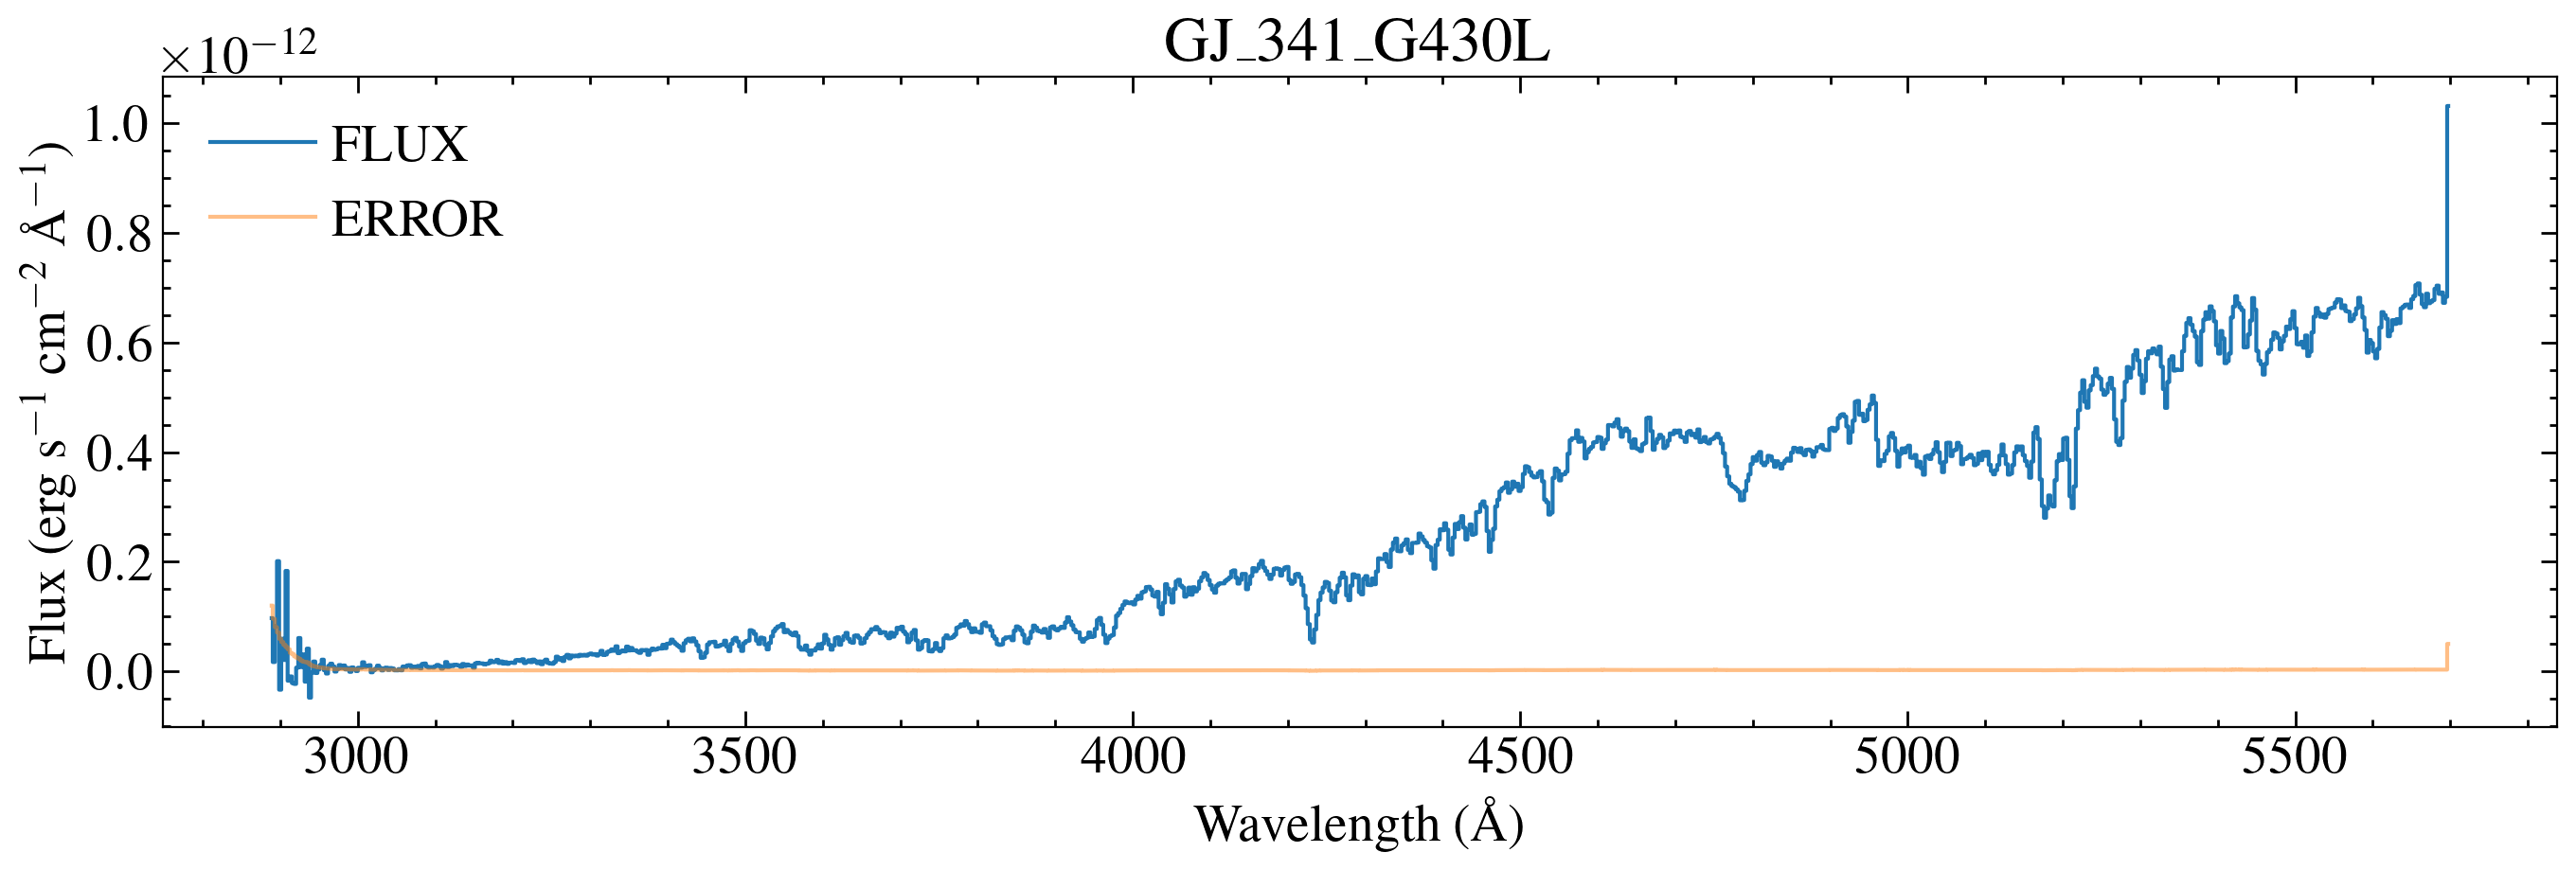

Spectrum saved as hlsp_muscles_hst_stis_gj_341_g430l_v1_component-spec.fits


In [74]:
import prepare_stis
importlib.reload(prepare_stis)
x1dpath = path
savepath = 'draft_hlsp/gj_341/'
hlsp = 'meats_hlsp_info.csv'
version = 1
prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath = savepath, plot=True, save_fits=True, normfac=1.0, star = 'GJ_341')

In [5]:
x1dsums = glob.glob('{}*x1dsum.fits'.format(path))
x1dsums

['/media/david/2tb_ext_hd/hddata/meats/hst/gj341/leoo06010_x1dsum.fits']

/media/david/2tb_ext_hd/hddata/meats/hst/gj341/leoo06010_x1dsum.fits
G130M


(-1e-15, 1e-14)

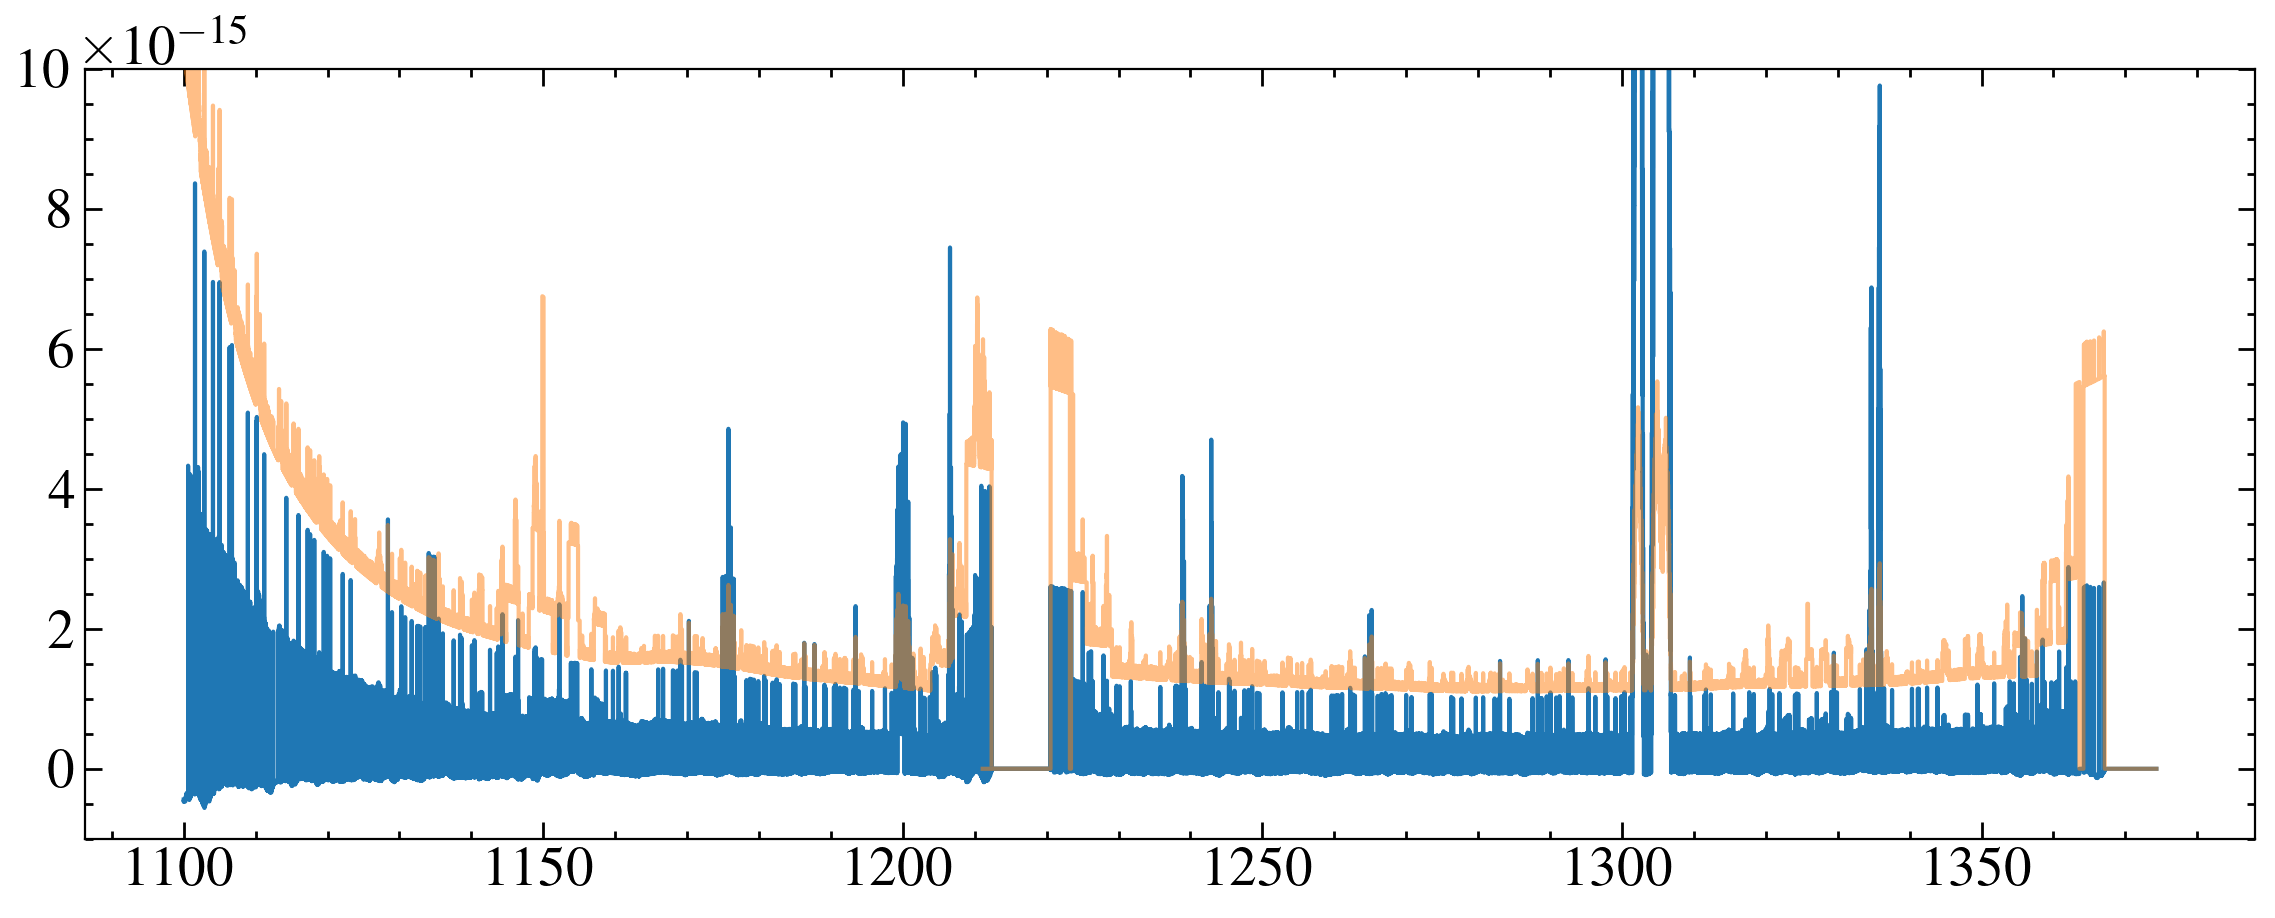

In [6]:
for x in x1dsums:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    for dt in data[::-1]:
        w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
        mask = w > 1100
        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid', c='C0')
        plt.step(w, e, where='mid', c='C1', alpha=0.5)
plt.ylim(-1e-15, 1e-14)
    

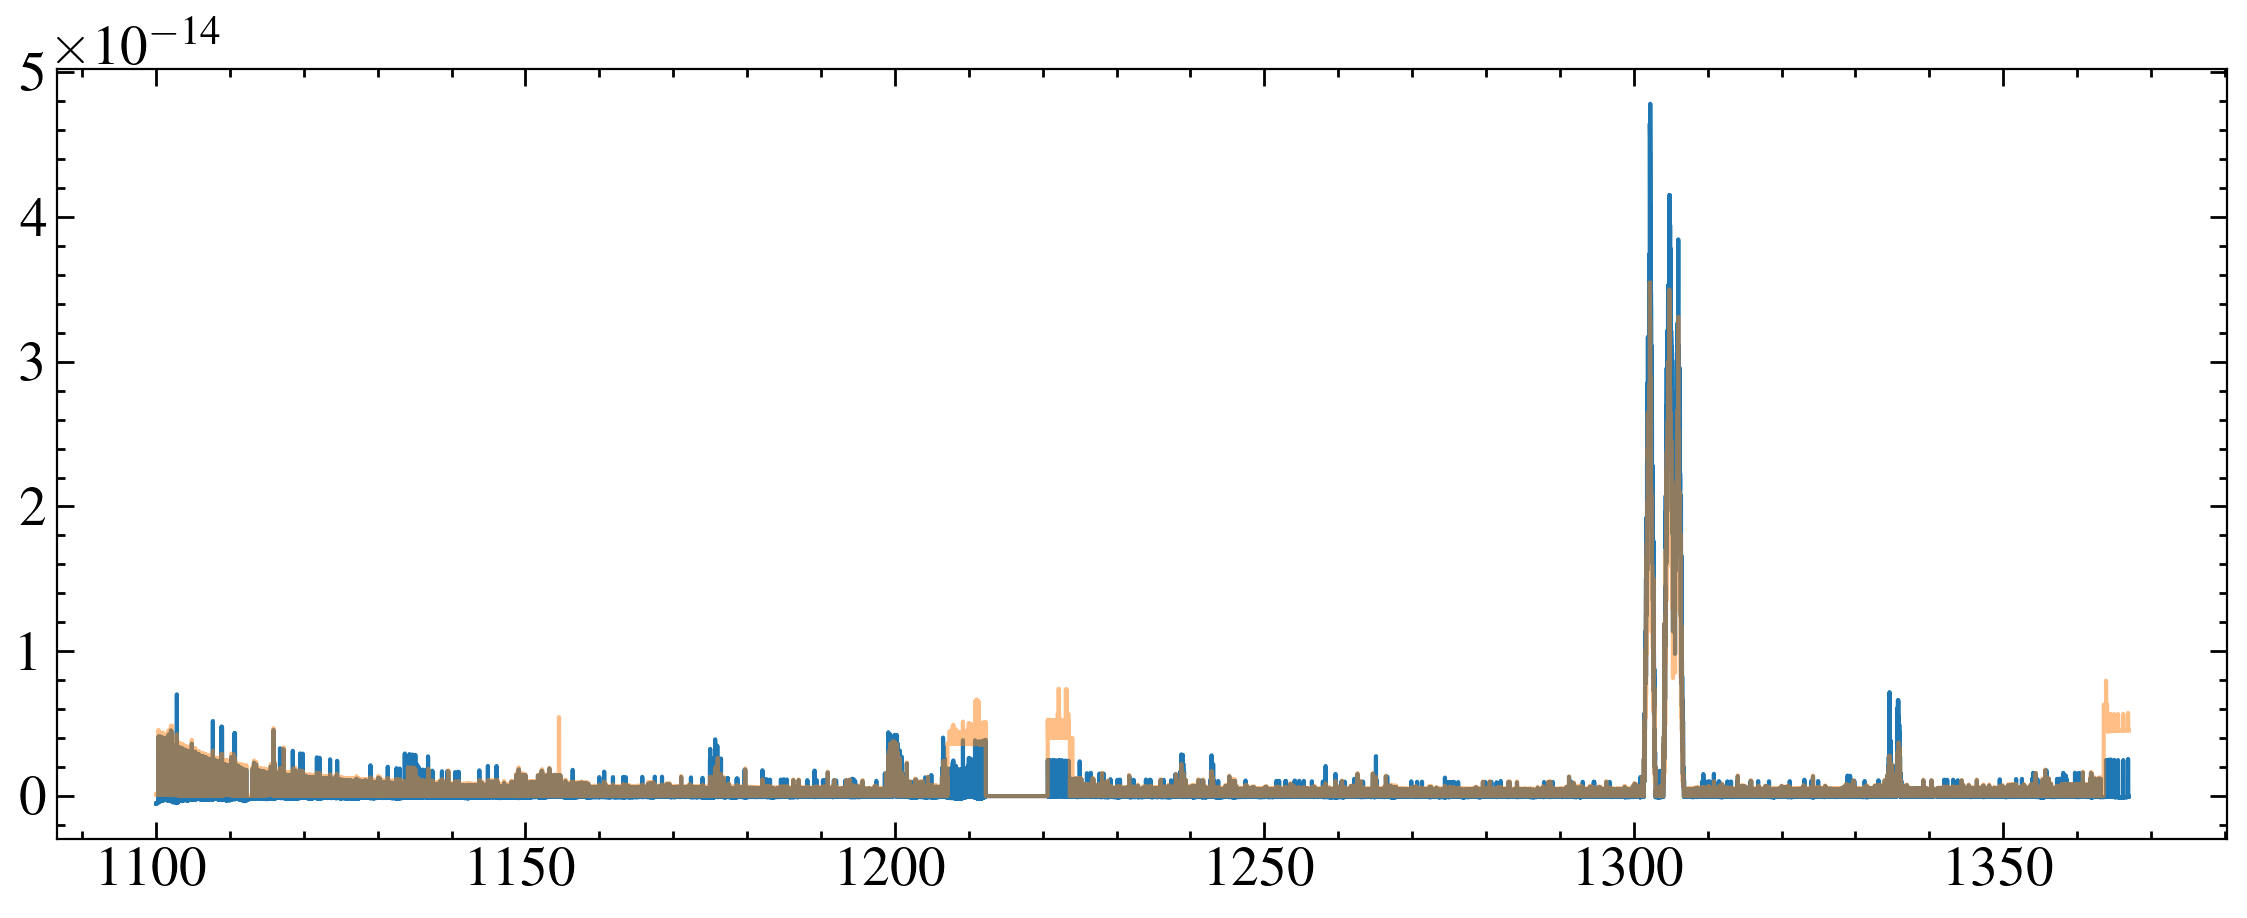

In [7]:
kw, kf, ke = np.loadtxt('cos_files/gj341/GJ341_G130M_mMEATS_Mm1_NOSCL_24jan2024.sav.txt', unpack = True, skiprows=2)
mask = kw > 1100
kw, kf, ke = kw[mask], kf[mask], ke[mask]
plt.step(kw, kf, where='mid', c='C0')
plt.step(kw, ke, where='mid', c='C1', alpha=0.5)

/media/david/2tb_ext_hd/hddata/meats/hst/gj341/leoo06010_x1dsum.fits
G130M


/tmp/ipykernel_30225/1903304160.py:9: RuntimeWarning: invalid value encountered in divide
  plt.step(w, f/e, where='mid', c='C0', alpha =0.5)
/tmp/ipykernel_30225/1903304160.py:10: RuntimeWarning: invalid value encountered in divide
  plt.plot(kw, kf/ke, c='C1', alpha=0.5)


(0.0, 10.0)

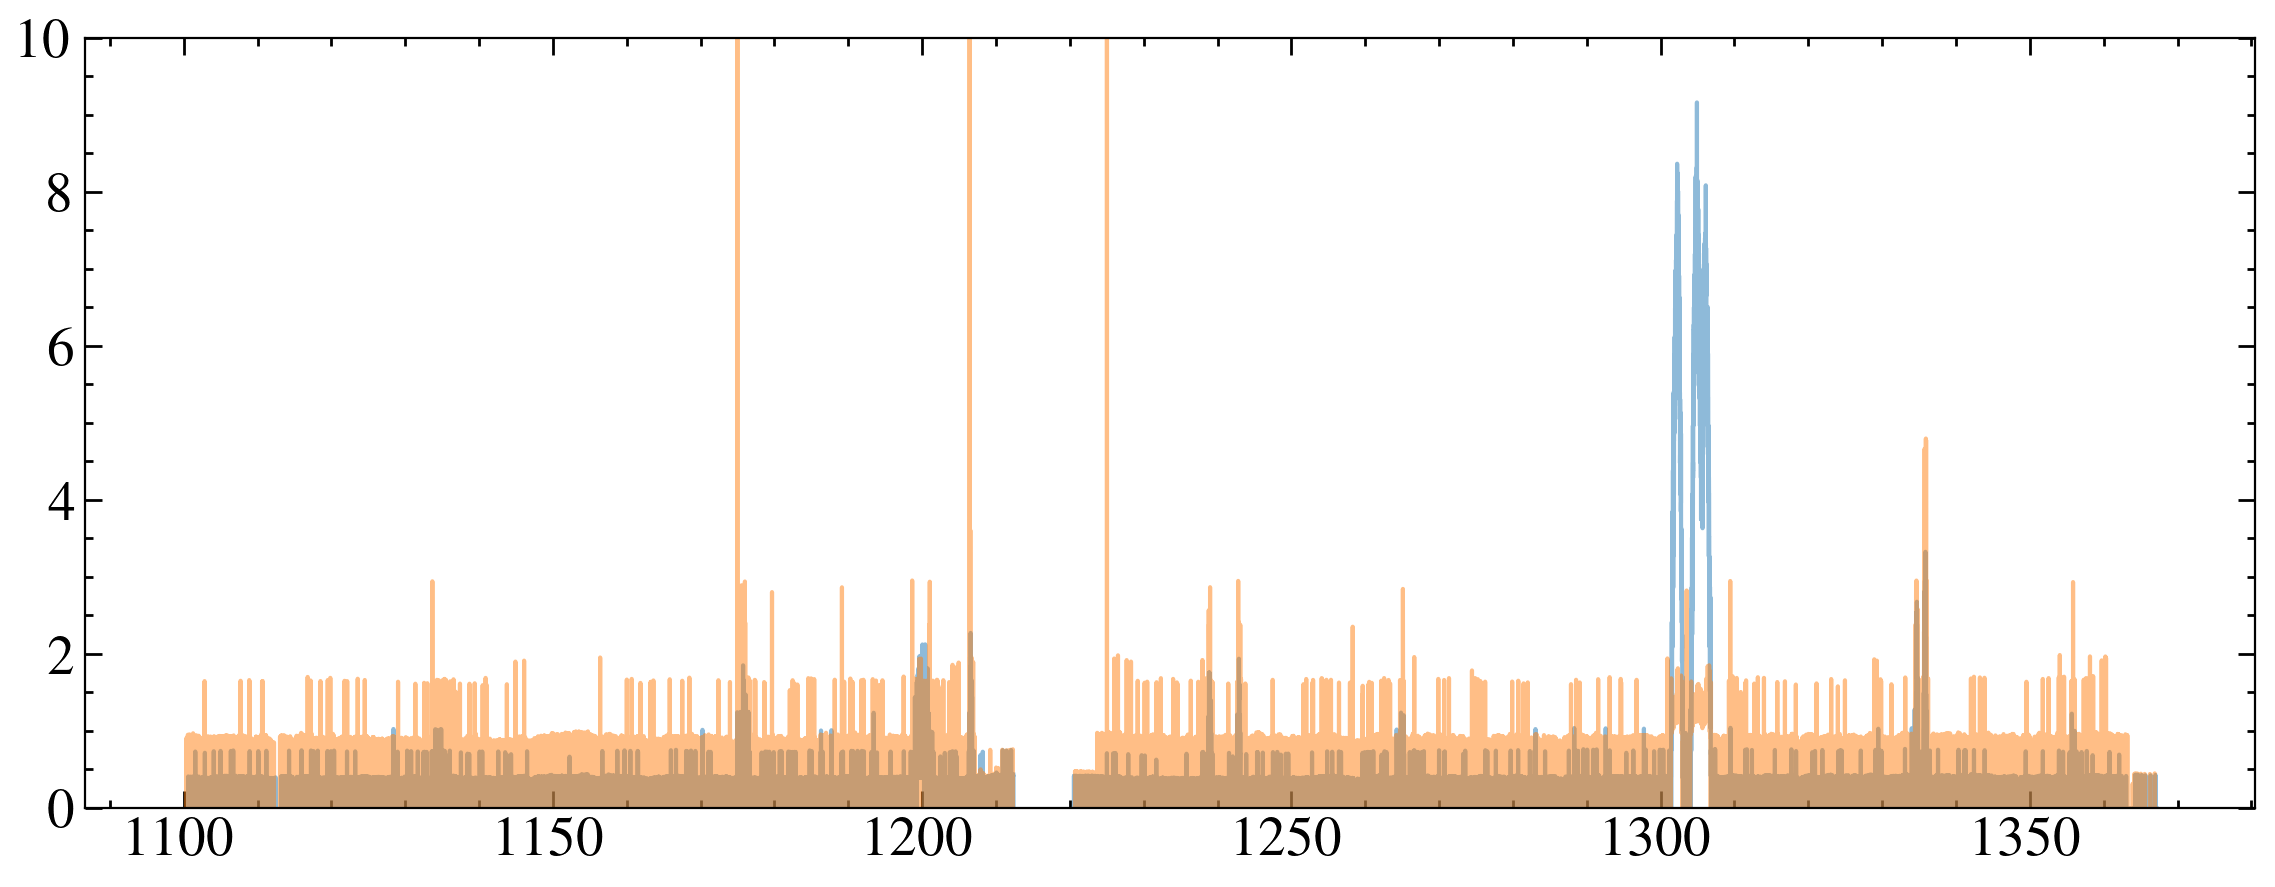

In [8]:
for x in x1dsums:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    for dt in data[::-1]:
        w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
        mask = w > 1100
        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f/e, where='mid', c='C0', alpha =0.5)
    plt.plot(kw, kf/ke, c='C1', alpha=0.5)
plt.ylim(0, 10)
# plt.ylim(-1e-15, 1e-14)

/media/david/2tb_ext_hd/hddata/meats/hst/gj341/leoo06010_x1dsum.fits
G130M


(1235.0, 1245.0)

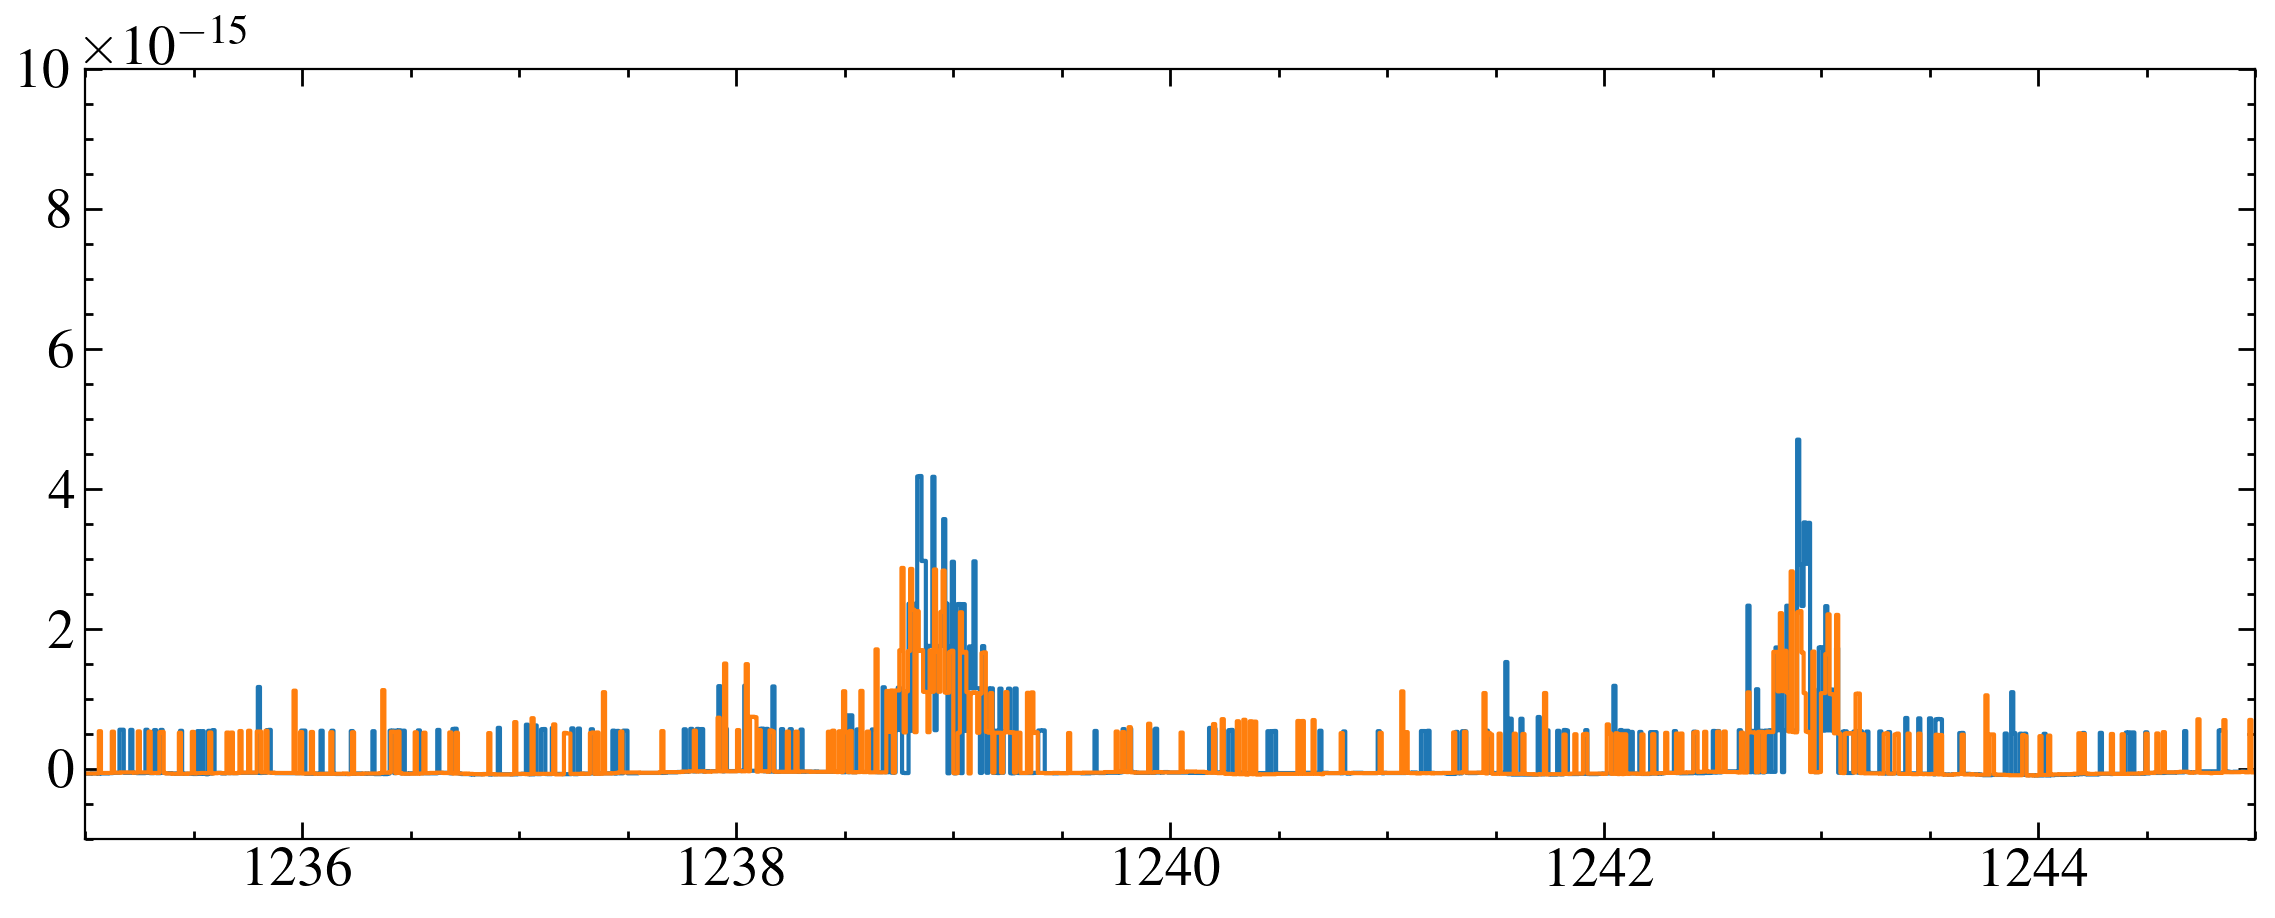

In [9]:
for x in x1dsums:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    for dt in data[::-1]:
        w, f, e= dt['WAVELENGTH'], dt['FLUX'], dt['ERROR']
        mask = w > 1100
        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid', c='C0')
        # plt.step(w, e, where='mid', c='C1', alpha=0.5)
plt.ylim(-1e-15, 1e-14)
plt.step(kw, kf, where='mid', c='C1')
plt.xlim(1235, 1245)
    

I guess it's pretty terrible either way

30291 30291 30291 30291
['/media/david/2tb_ext_hd/hddata/meats/hst/gj341/leoo06010_x1dsum.fits']


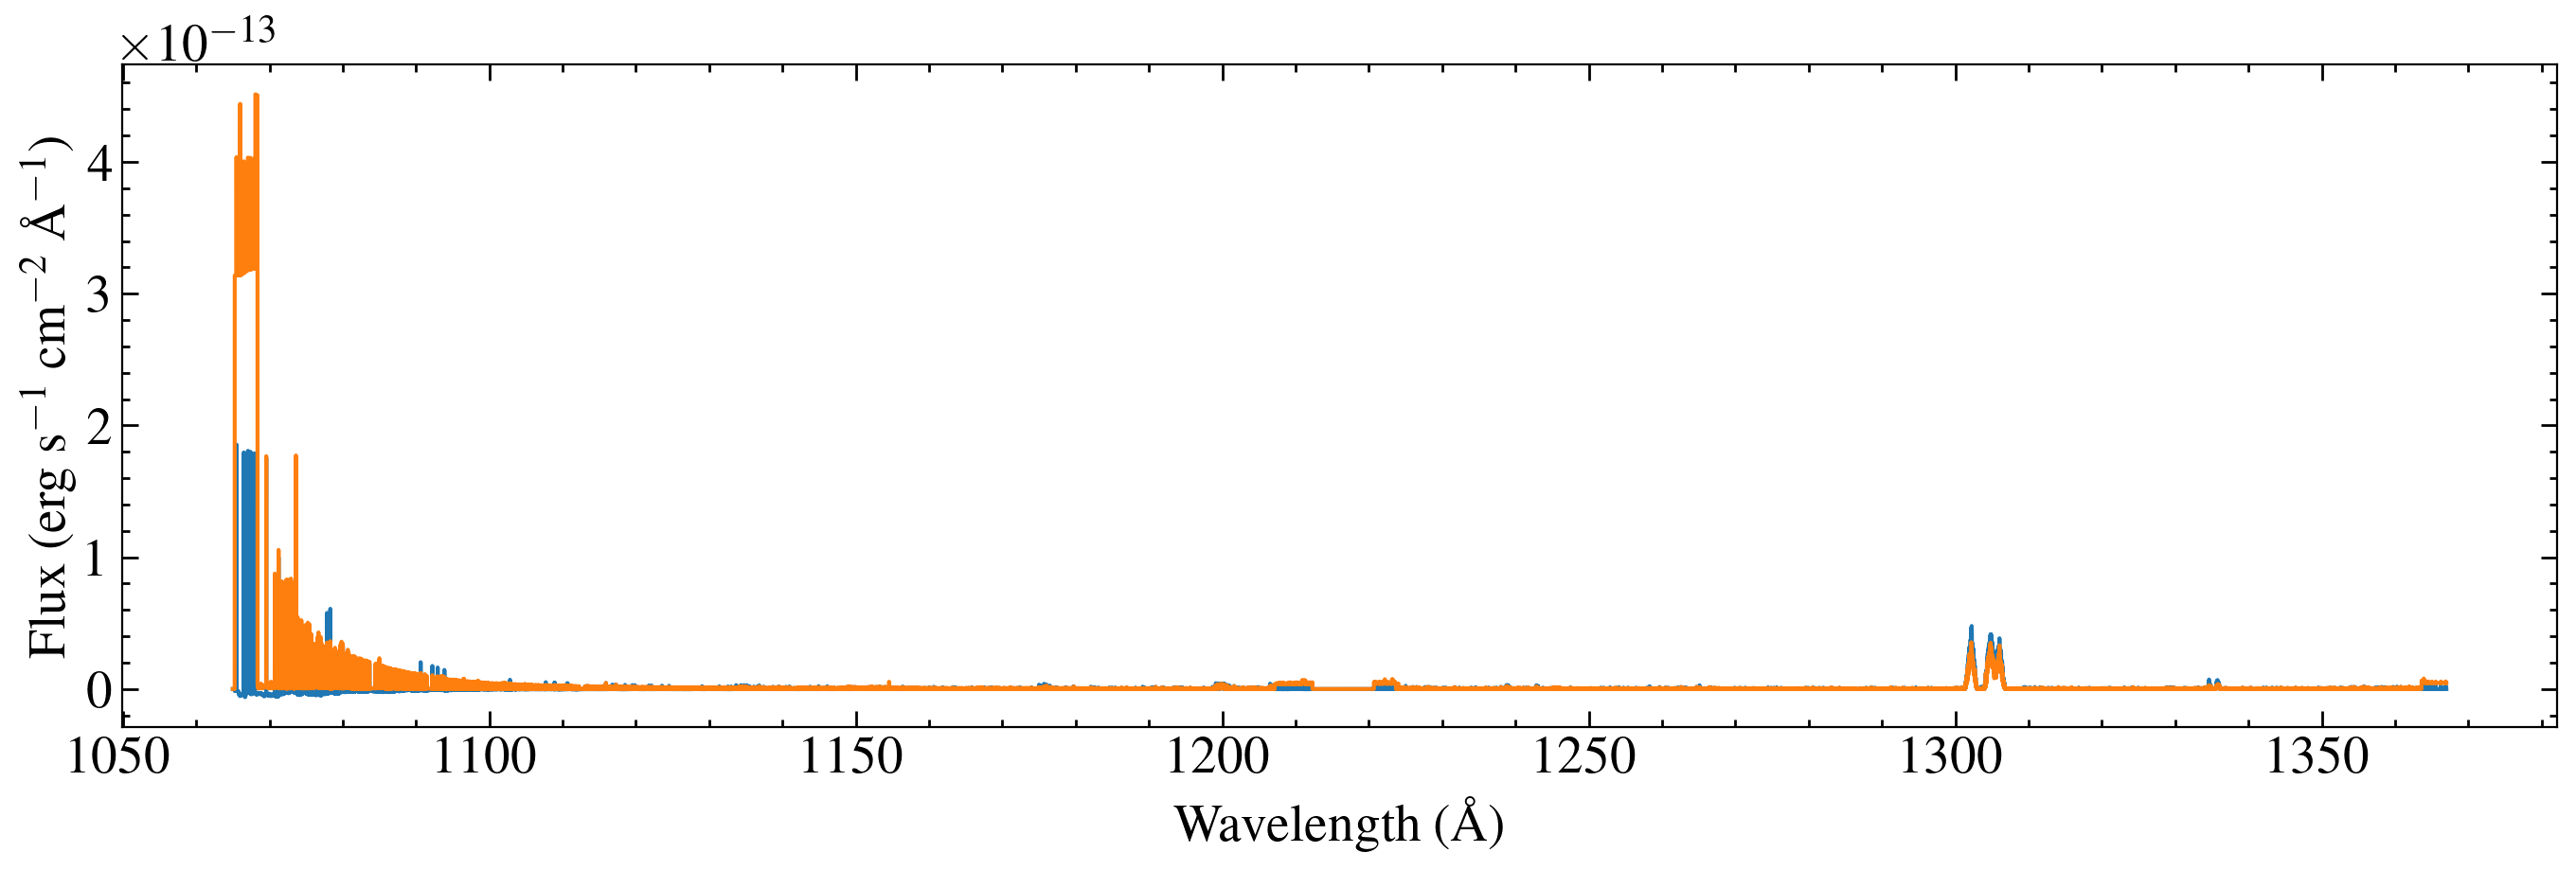

Spectrum saved as hlsp_muscles_hst_cos_gj_341_g130m_v1_component-spec.fits


In [10]:
import prepare_cos
importlib.reload(prepare_cos)

savpath = 'cos_files/gj341/GJ341_G130M_mMEATS_Mm1_NOSCL_24jan2024.sav.txt'
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/gj341/'
hlsp = 'meats_hlsp_info.csv'
version = 1
savepath = 'draft_hlsp/gj_341/'
# star = 
prepare_cos.make_cos_spectrum(savpath, version, x1dpath, hlsp, savepath = savepath, plot=True, save_fits=True, star='GJ_341')

In [90]:
# hasppath = '{}/hasp/hst_16701_cos-stis_hd-304636_g130m-sg230l-g430l_leoo_cspec.fits'.format(path)
# hasp = fits.getdata(hasppath, 1)[0]

# hw, hf, he= hasp['WAVELENGTH'], hasp['FLUX'], hasp['ERROR']
# mask = (hw > 1100) & (hw < 1370)
# hw, hf, he = hw[mask], hf[mask], he[mask]
# # plt.step(hw, hf, where='mid')
# plt.step(hw, he, where='mid', alpha=0.5)
# plt.ylim(-1e-15, 1e-14)
# # plt.step(kw, kf, where='mid')
# plt.step(kw, ke, where='mid',alpha=0.5)

['/media/david/2tb_ext_hd/hddata/meats/hst/gj341/leoo06010_x1dsum.fits']
[array([0., 0., 0., ..., 0., 0., 0.])]
[[0 0 0 ... 0 0 0]]
[0 0 0 ... 0 0 0]
30291 30291 30291 30291
['/media/david/2tb_ext_hd/hddata/meats/hst/gj341/leoo06010_x1dsum.fits']


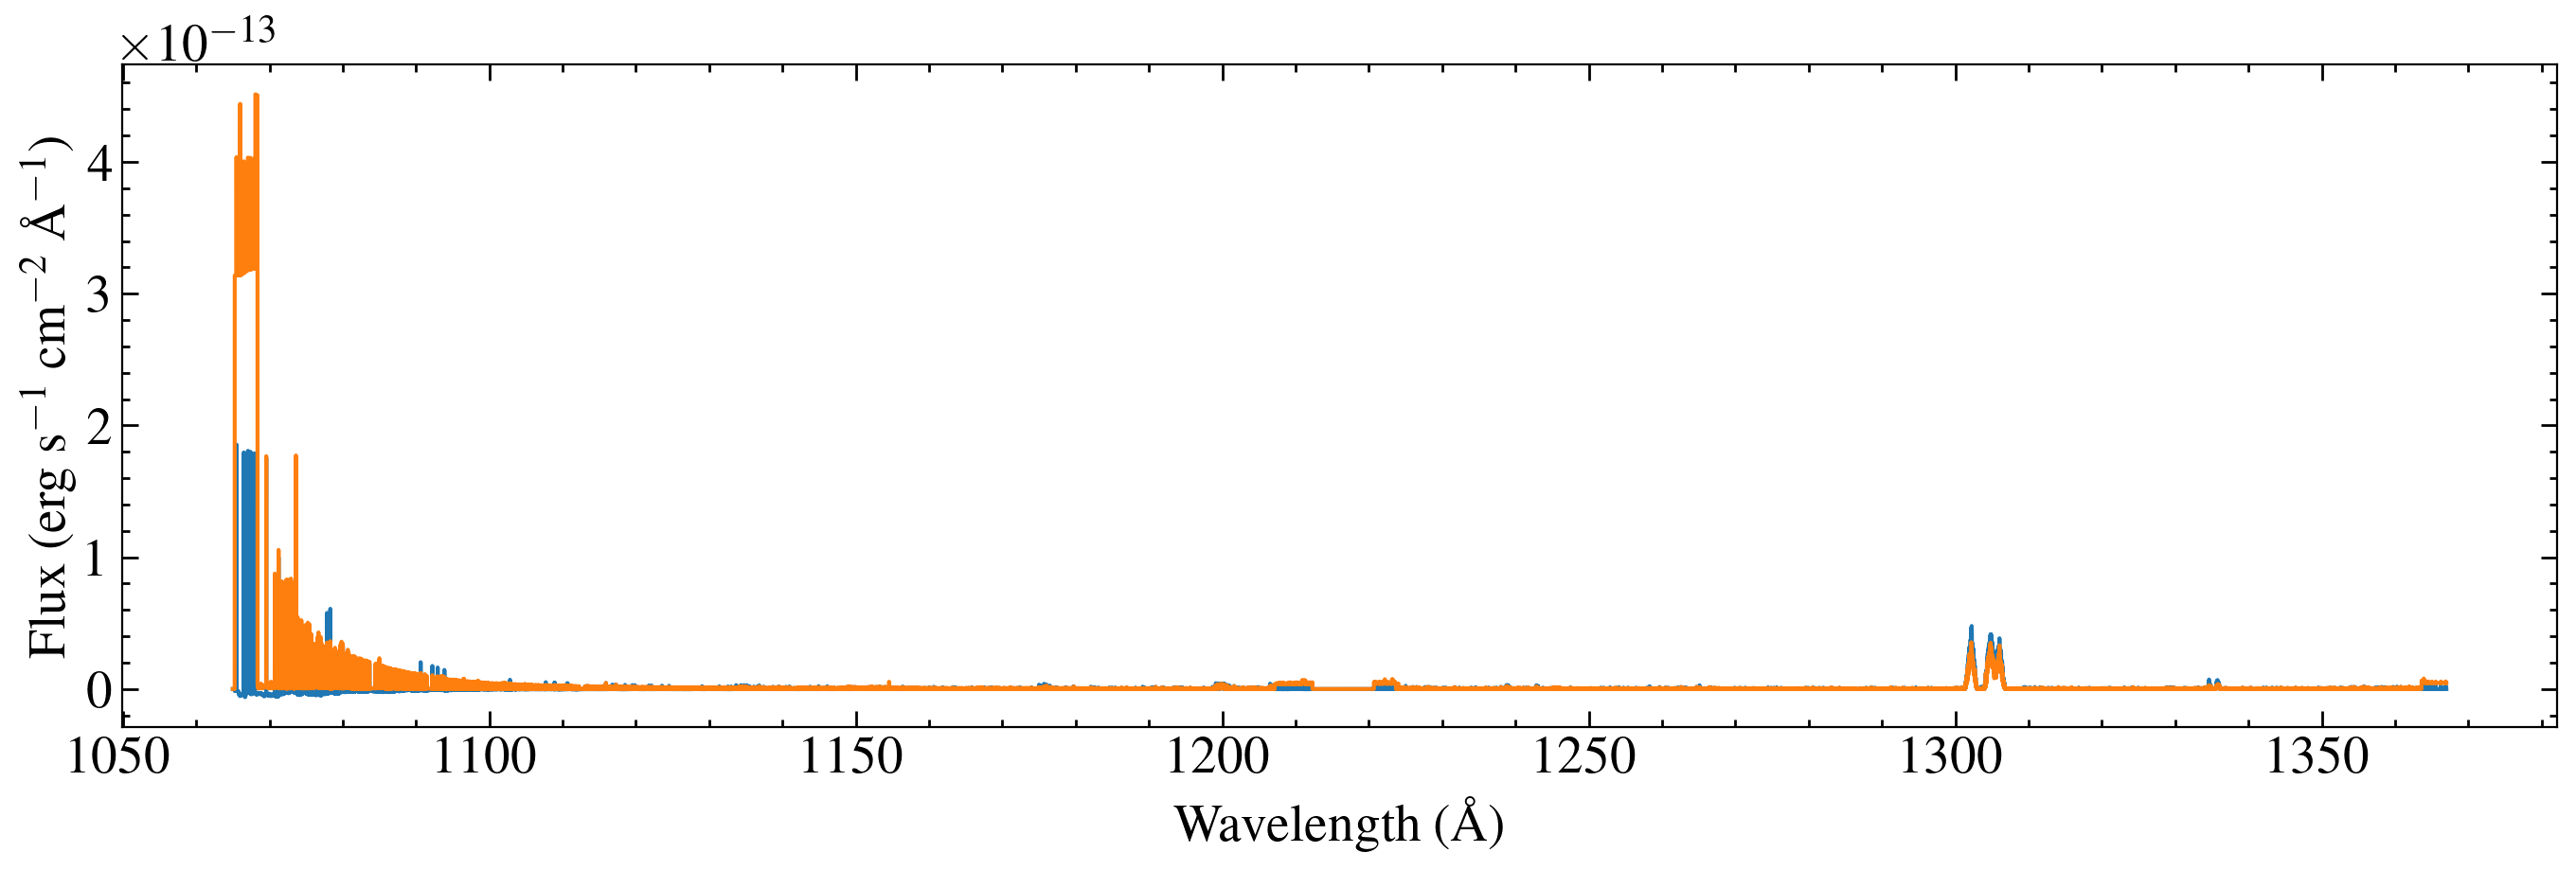

Spectrum saved as hlsp_muscles_hst_cos_gj_341_g130m_v1_component-spec.fits


In [69]:
import prepare_cos
importlib.reload(prepare_cos)

savpath = 'cos_files/gj341/GJ341_G130M_mMEATS_Mm1_NOSCL_24jan2024.sav.txt'
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/gj341/'
hlsp = 'meats_hlsp_info.csv'
version = 1
savepath = 'draft_hlsp/gj_341/'
# star = 
prepare_cos.make_cos_spectrum(savpath, version, x1dpath, hlsp, savepath = savepath, plot=True, save_fits=True, star='GJ_341')

In [53]:
# hasppath = '{}/hasp/hst_16701_cos-stis_hd-304636_g130m-sg230l-g430l_leoo_cspec.fits'.format(path)
# hasp = fits.getdata(hasppath, 1)[0]

# hw, hf, he= hasp['WAVELENGTH'], hasp['FLUX'], hasp['ERROR']

# plt.plot(hw, hf)
# plt.xlim(2300, 3700)
# plt.yscale('log')

In [21]:
xpath = '/media/david/2tb_ext_hd/hddata/meats/xmm/gj341/'
xname = 'GJ341.fits'
hdul = fits.open('{}{}'.format(xpath, xname))
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TARGET  = 'GJ 341  '                                                            
HIERARCH Instrument = 'EPIC    '                                                

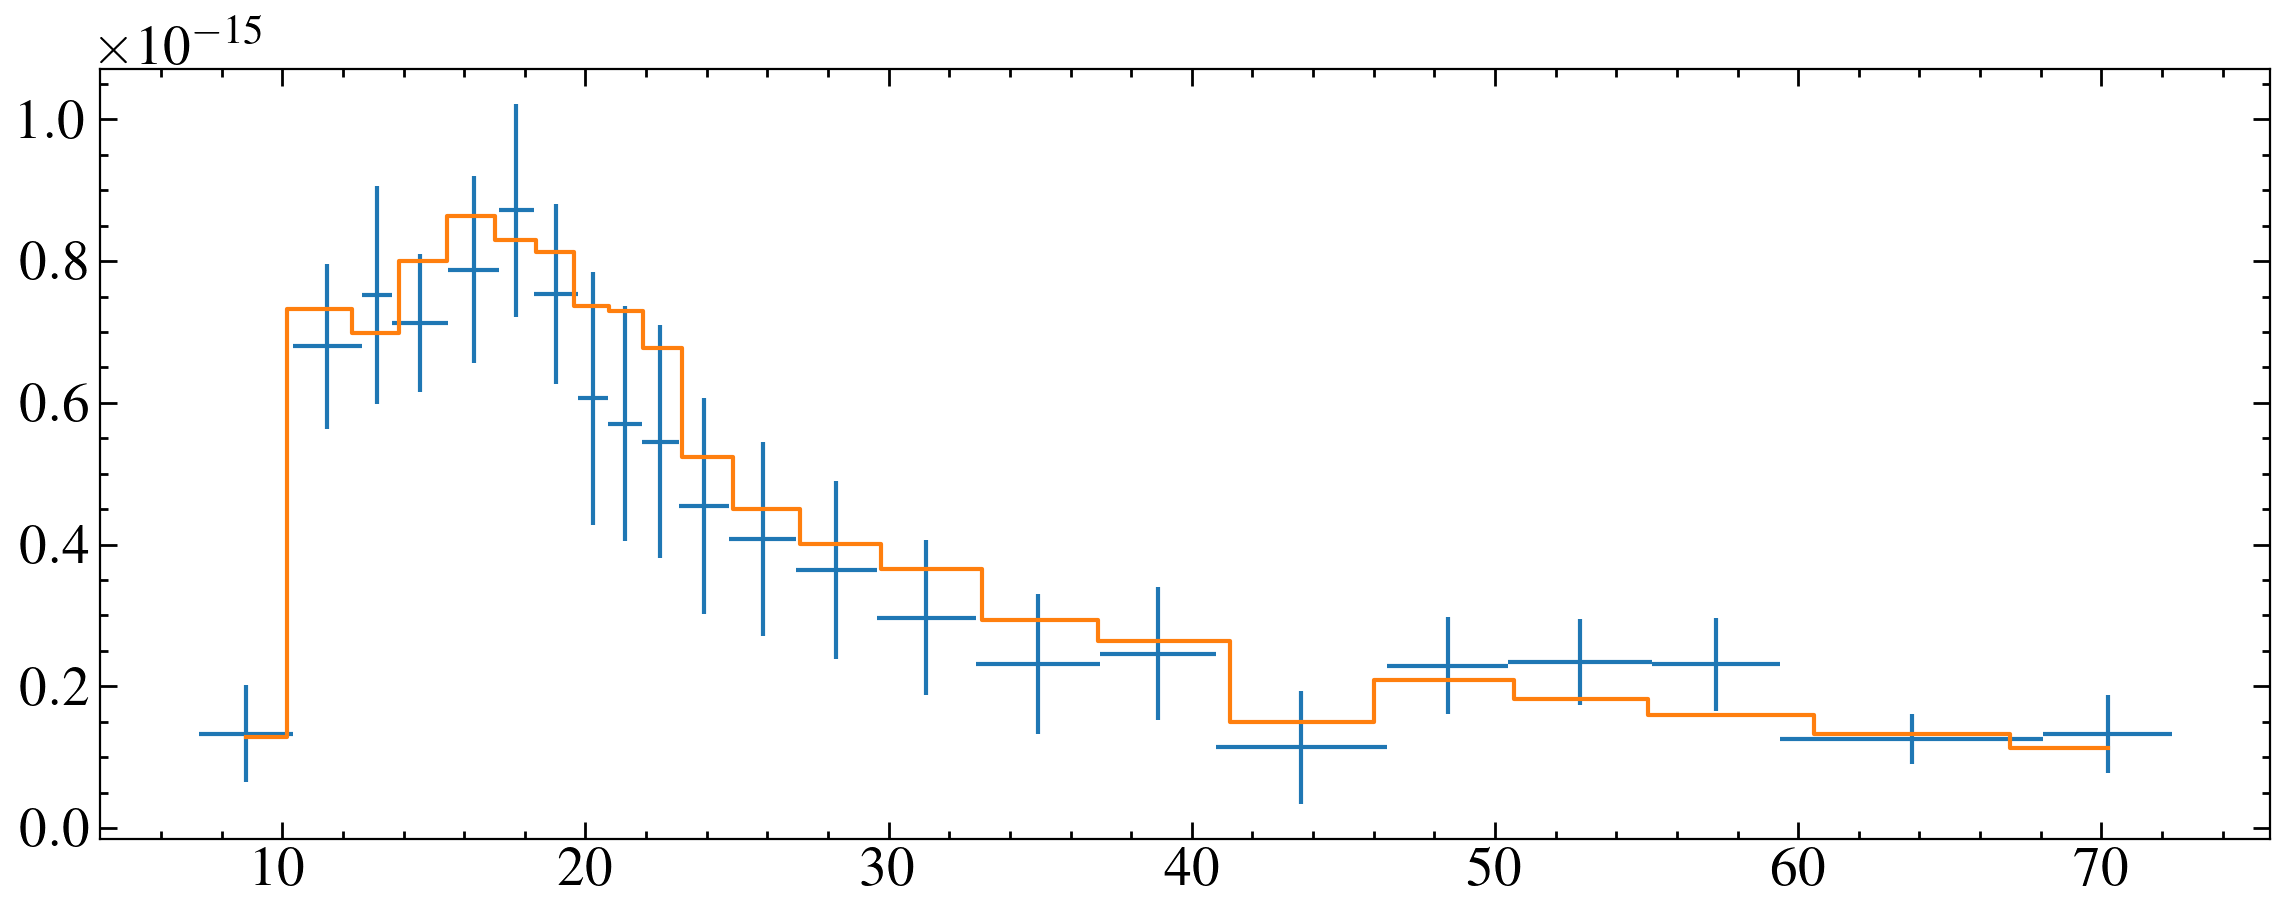

In [40]:
data = hdul[1].data
model= hdul[2].data
plt.errorbar(data['WAVE'], data['FLUX'], yerr=data['CFlux_err'], xerr=data['bin_width'], ls='none')
plt.step(data['WAVE'], data['MFlux'], where='mid')

hdul.close()

How does it compare with my extractions? Not bad. Waiting for model params.

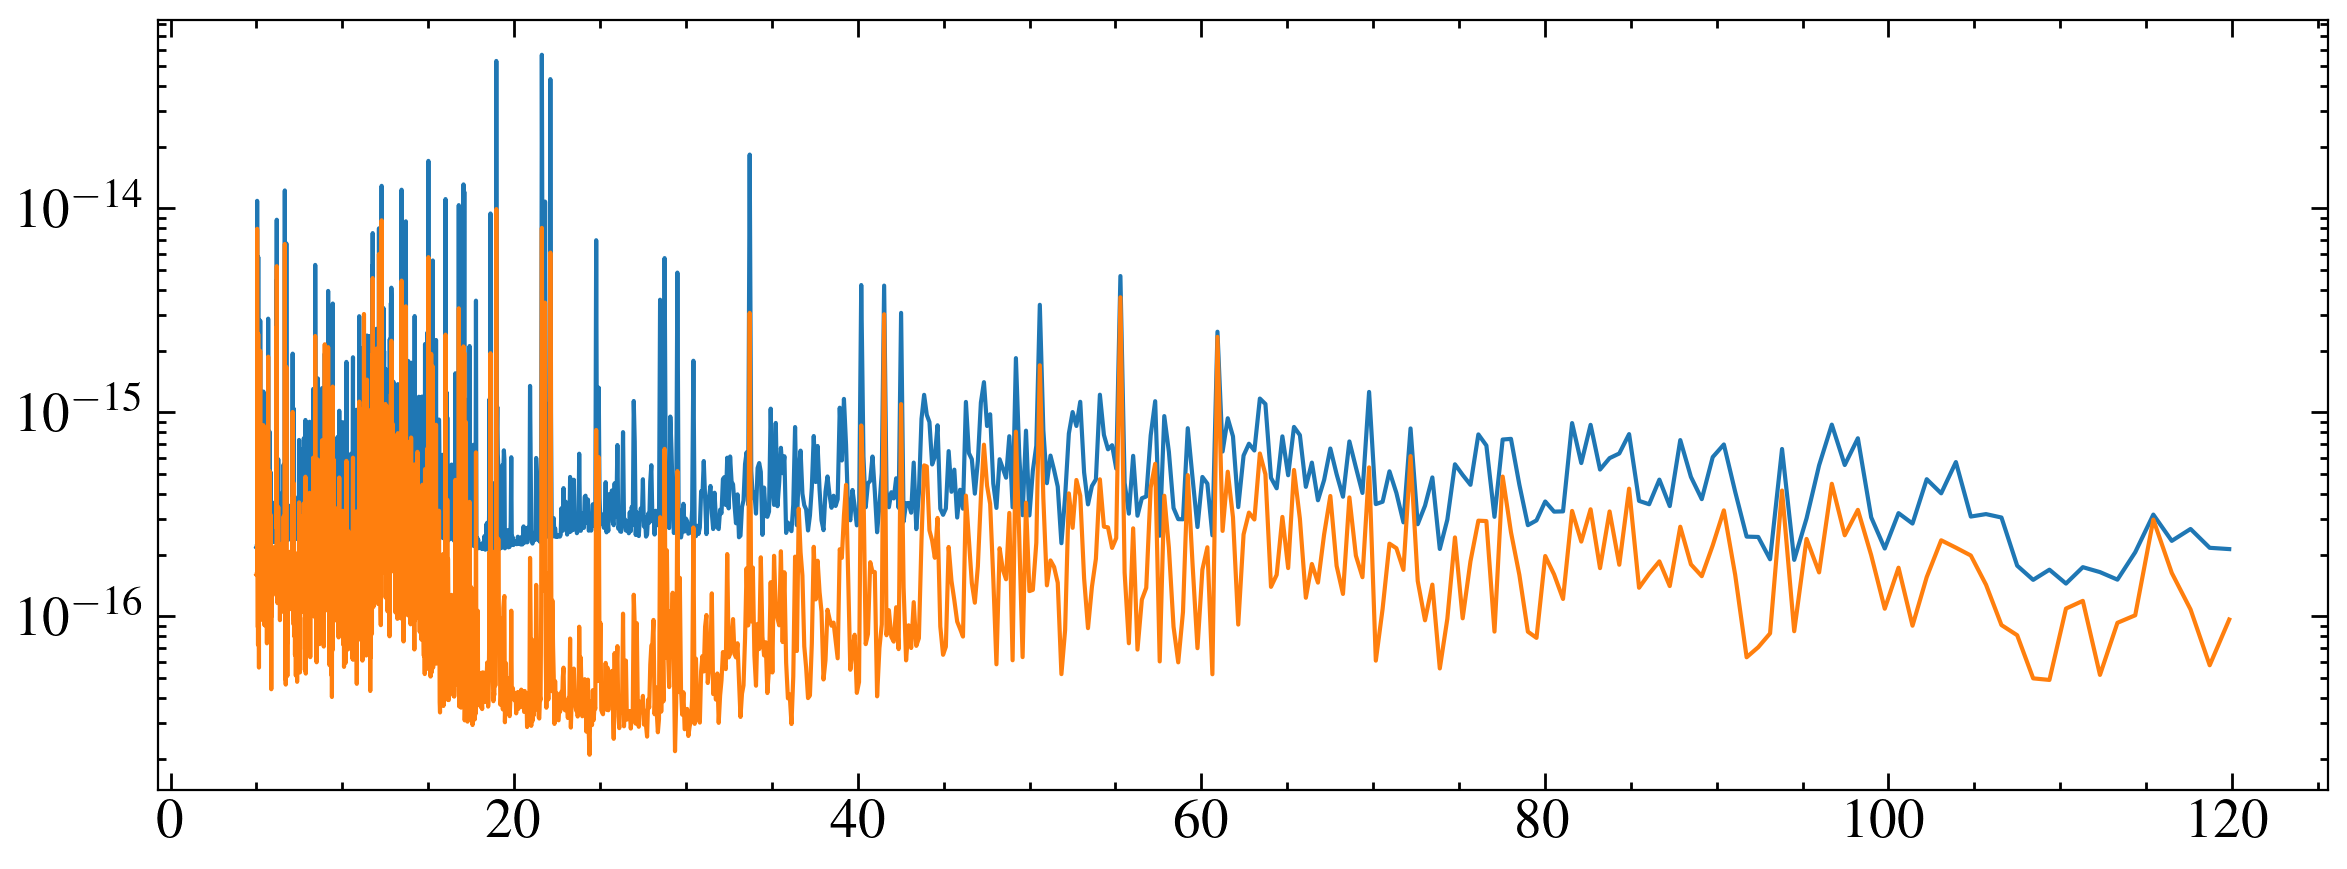

In [41]:
# hdr = hdul[0].header
# hdr

In [31]:


# hdr.append(('mos1_FILTER', 'Medium'))
# hdr.append(('mos2_FILTER', 'Medium'))
# hdr.append(('pn_FILTER', 'Medium'))
# hdr.append(('pn_DURATION', 24700))
# hdr.append(('pn_DATE-OBS', '2022-01-23 11:35:27'))
# hdr.append(('pn_DATE-END','2022-01-23 18:27:07'))
# hdr.append(('OBS_ID', '0892000201'))
# hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TARGET  = 'GJ 341  '                                                            
HIERARCH Instrument = 'EPIC    '                                                
HIERARCH mos1_FILTER = 'Medium  '                                               
HIERARCH mos2_FILTER = 'Medium  '                                               
HIERARCH pn_FILTER = 'Medium  '                                                 
HIERARCH pn_DURATION = 24700                                                    
HIERARCH pn_DATE-OBS = '2022-01-23 11:35:27'                                    
HIERARCH pn_DATE-END = '2022-01-23 18:27:07'                                    
OBS_ID  = '0892000201'      

In [33]:
# hdul.writeto('{}/GJ341_djw.fits'.format(xpath), overwrite=True)

In [39]:
import prepare_xmm

xmm_path = '{}{}'.format(xpath, 'GJ341_djw.fits')
version = 1
hlsp = dict(Table.read('meats_hlsp_info.csv'))
prepare_xmm.make_xmm_spectra(xmm_path, savepath, version, hlsp, apec_repo='models/', make_apec=True, save_ecsv=False, save_fits=True)

In [ ]:
# 4.1e-14 erg/s/cm2 (or Lx = 5.4e26 erg/s) with 0.05 dex error:
print(abs(10**(np.log10(4.1e-14) + 0.05)-4.1e-14 ))
print(abs( 10**(np.log10(4.1e-14) - 0.05)-4.1e-14))

t1 = 1.7*u.MK.to(u.keV, equivalencies=u.temperature_energy())
print(t1)
print((0.4/1.7)*t1)
print((0.5/1.7)*t1)

t2 = 9.6*u.MK.to(u.keV, equivalencies=u.temperature_energy())
print(t2)
print((2.0/9.6)*t2)
print((3.1/9.6)*t2)

# kT1 = 1.7_(-0.4)^(+0.5) MK
# kT2 = 9.6_(-2.0)^(+3.1) MK

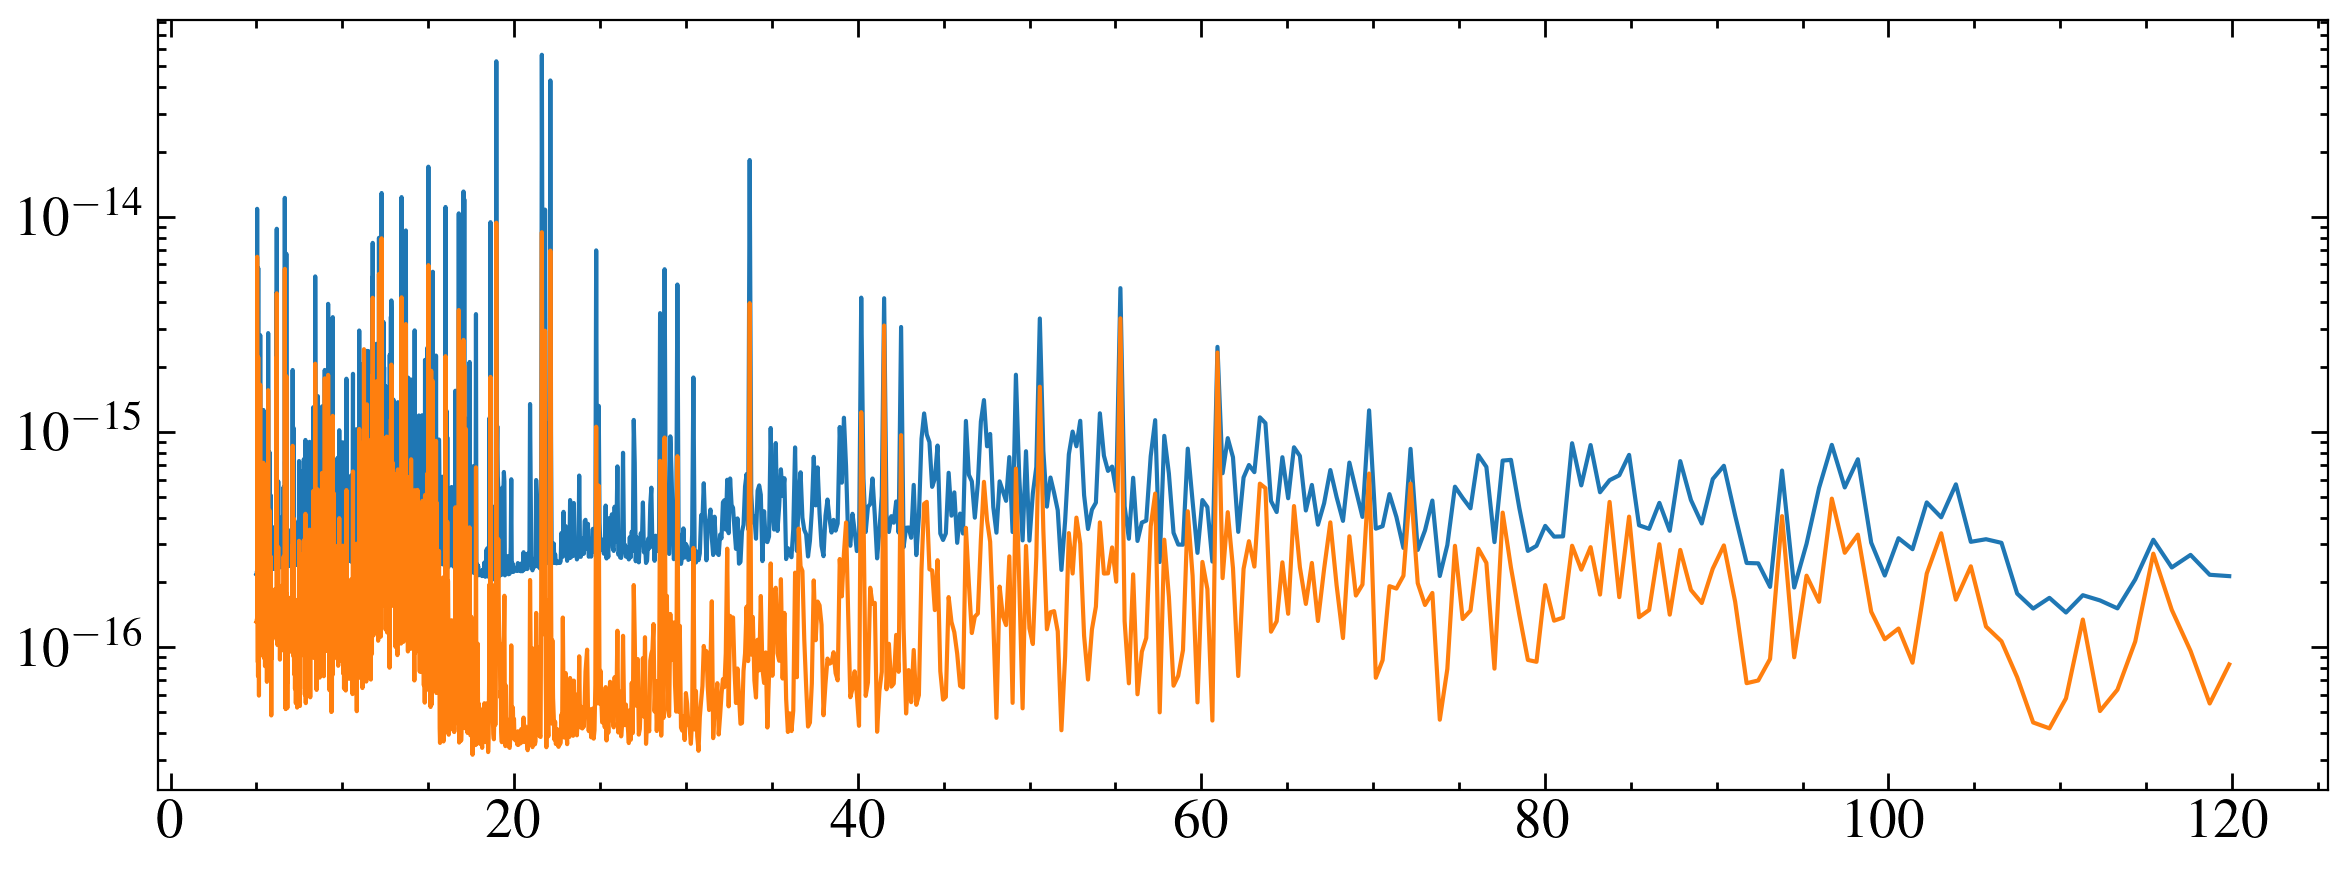

In [94]:
xray = Table.read('models/GJ341_apec_errs.ecsv')
plt.plot(xray['WAVELENGTH'], xray['FLUX'])
plt.plot(xray['WAVELENGTH'], xray['ERROR'])
plt.yscale('log')

testing out getting name and coords from simbad

In [50]:
# from astroquery.simbad import Simbad

In [51]:
# result_table = Simbad.query_object('HD 304636')

# print(result_table)


In [52]:
# result_table['RA']

Ok should be easy to implement, adding it to meta_fix.

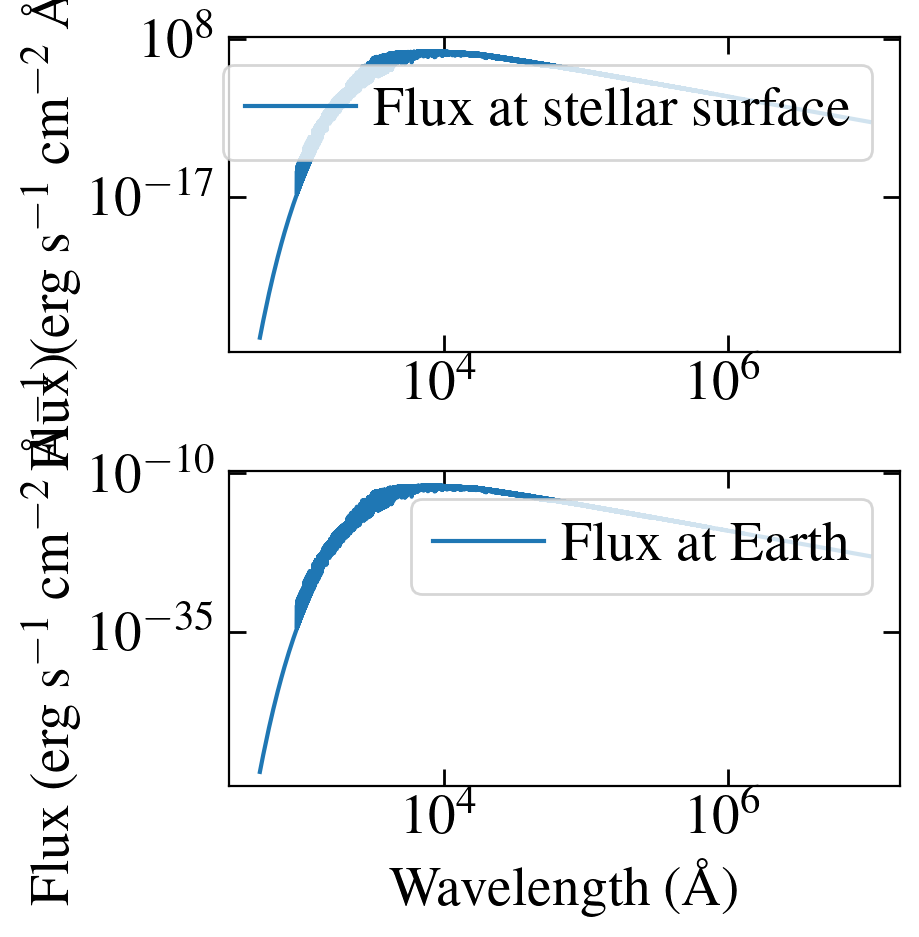

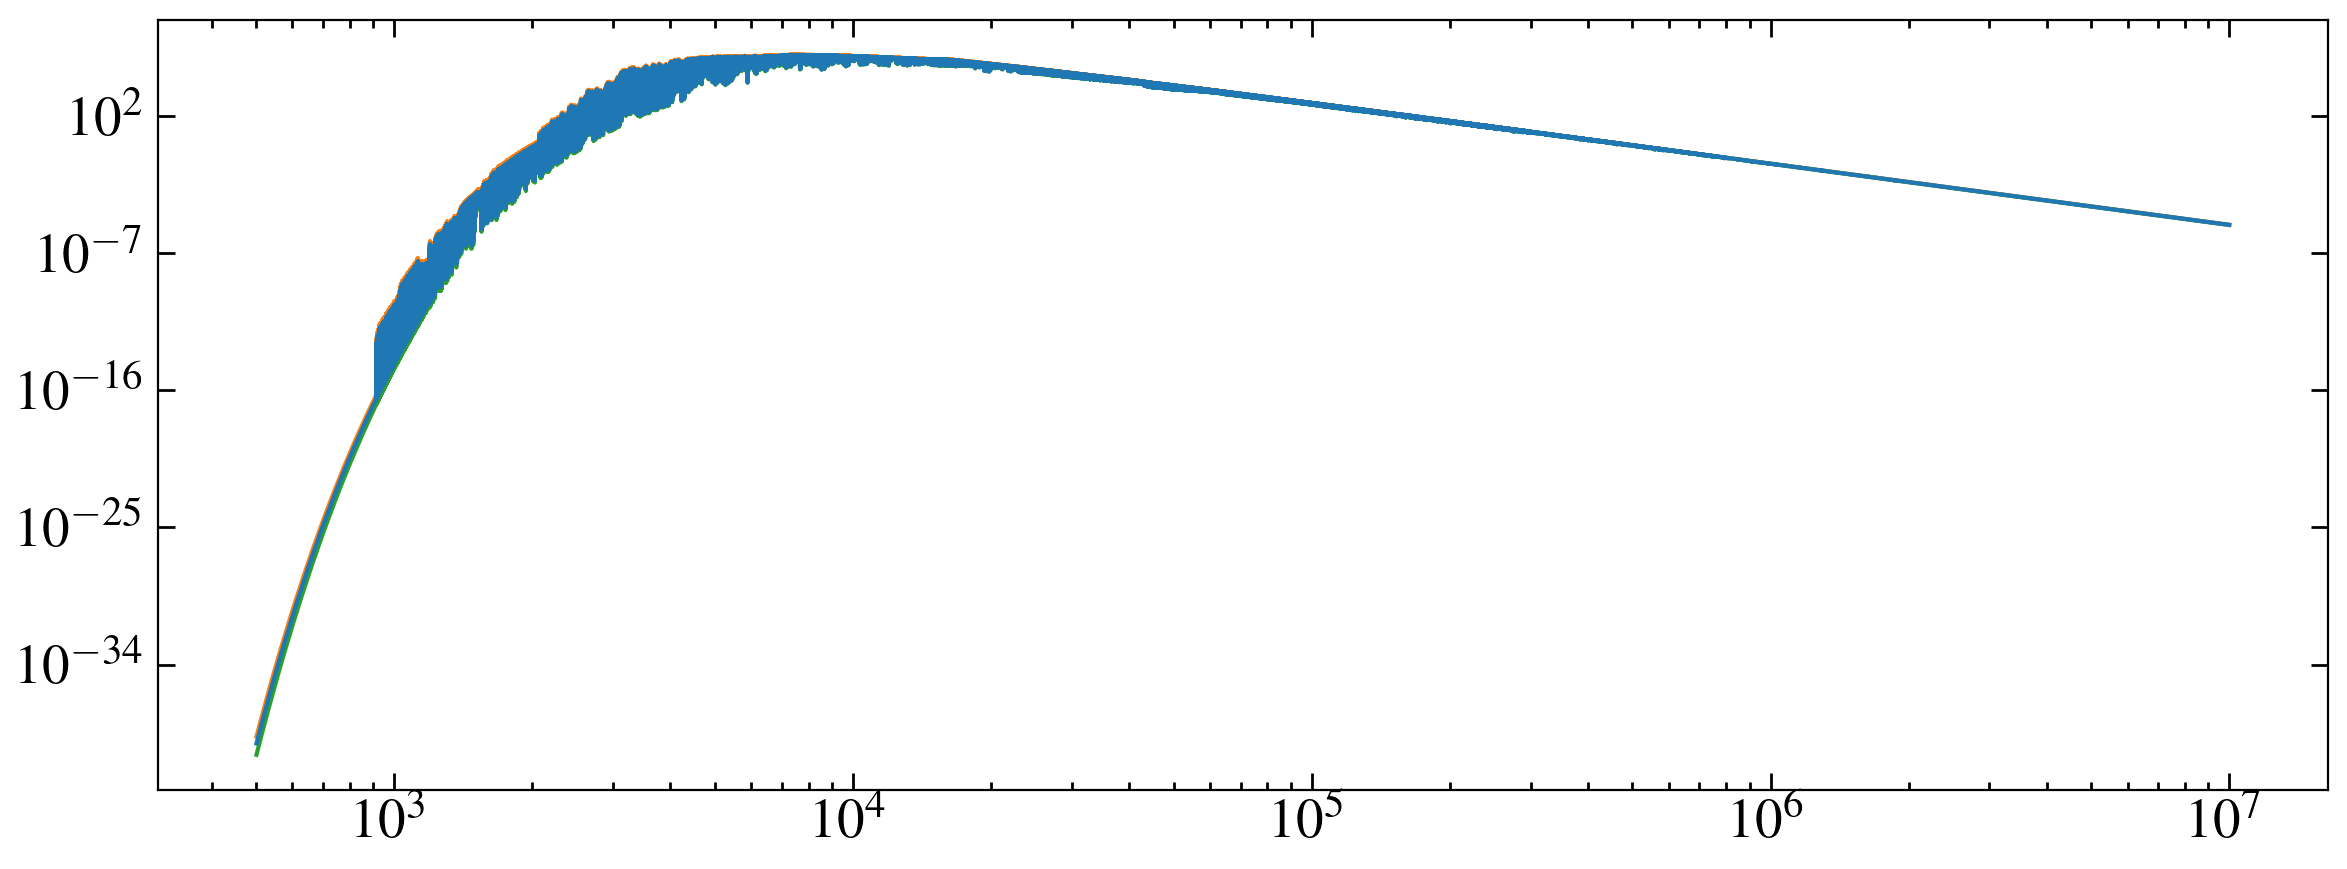

In [70]:
import prepare_phoenix_svo as pp
importlib.reload(pp)

G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)
mass = 0.48
teff = 3770
teff_e = 70

radius = 0.5066
distance = 10.45

save_path = 'models/'
star = 'GJ_341'
# g = ((G*mass*M)/(radius*R)**2).to(u.cm/u.s**2)
g = 4.72
repo = '/media/david/2tb_ext_hd/hddata/mega_muscles/data-vacuum/'

star_params = {'Teff': teff, 'Teff_e':teff_e,  'logg': g, 'FeH': 0.00, 'aM': 0, 'Radius':radius*u.R_sun, 'Distance':distance*u.pc}
# pw, pf, pe = pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=True, make_error=True)
pdata = Table.read('models/{}_phoenix_interpolated.ecsv'.format(star))
pw, pf, pe = pdata['WAVELENGTH'], pdata['FLUX'], pdata['ERROR']
normfac = ((radius*R)/((distance*u.pc).to(u.m)))**2

In [75]:
hlsp_x1ds = glob.glob('draft_hlsp/gj_341/*hst*.fits')
hlsp_x1ds

['draft_hlsp/gj_341/hlsp_muscles_hst_stis_gj_341_g430l_v1_component-spec.fits',
 'draft_hlsp/gj_341/hlsp_muscles_hst_cos_gj_341_g130m_v1_component-spec.fits',
 'draft_hlsp/gj_341/hlsp_muscles_hst_stis_gj_341_g230l_v1_component-spec.fits',
 'draft_hlsp/gj_341/hlsp_muscles_hst_stis_gj_341_g140m_v1_component-spec.fits']

draft_hlsp/gj_341/hlsp_muscles_hst_stis_gj_341_g430l_v1_component-spec.fits
draft_hlsp/gj_341/hlsp_muscles_hst_stis_gj_341_g230l_v1_component-spec.fits


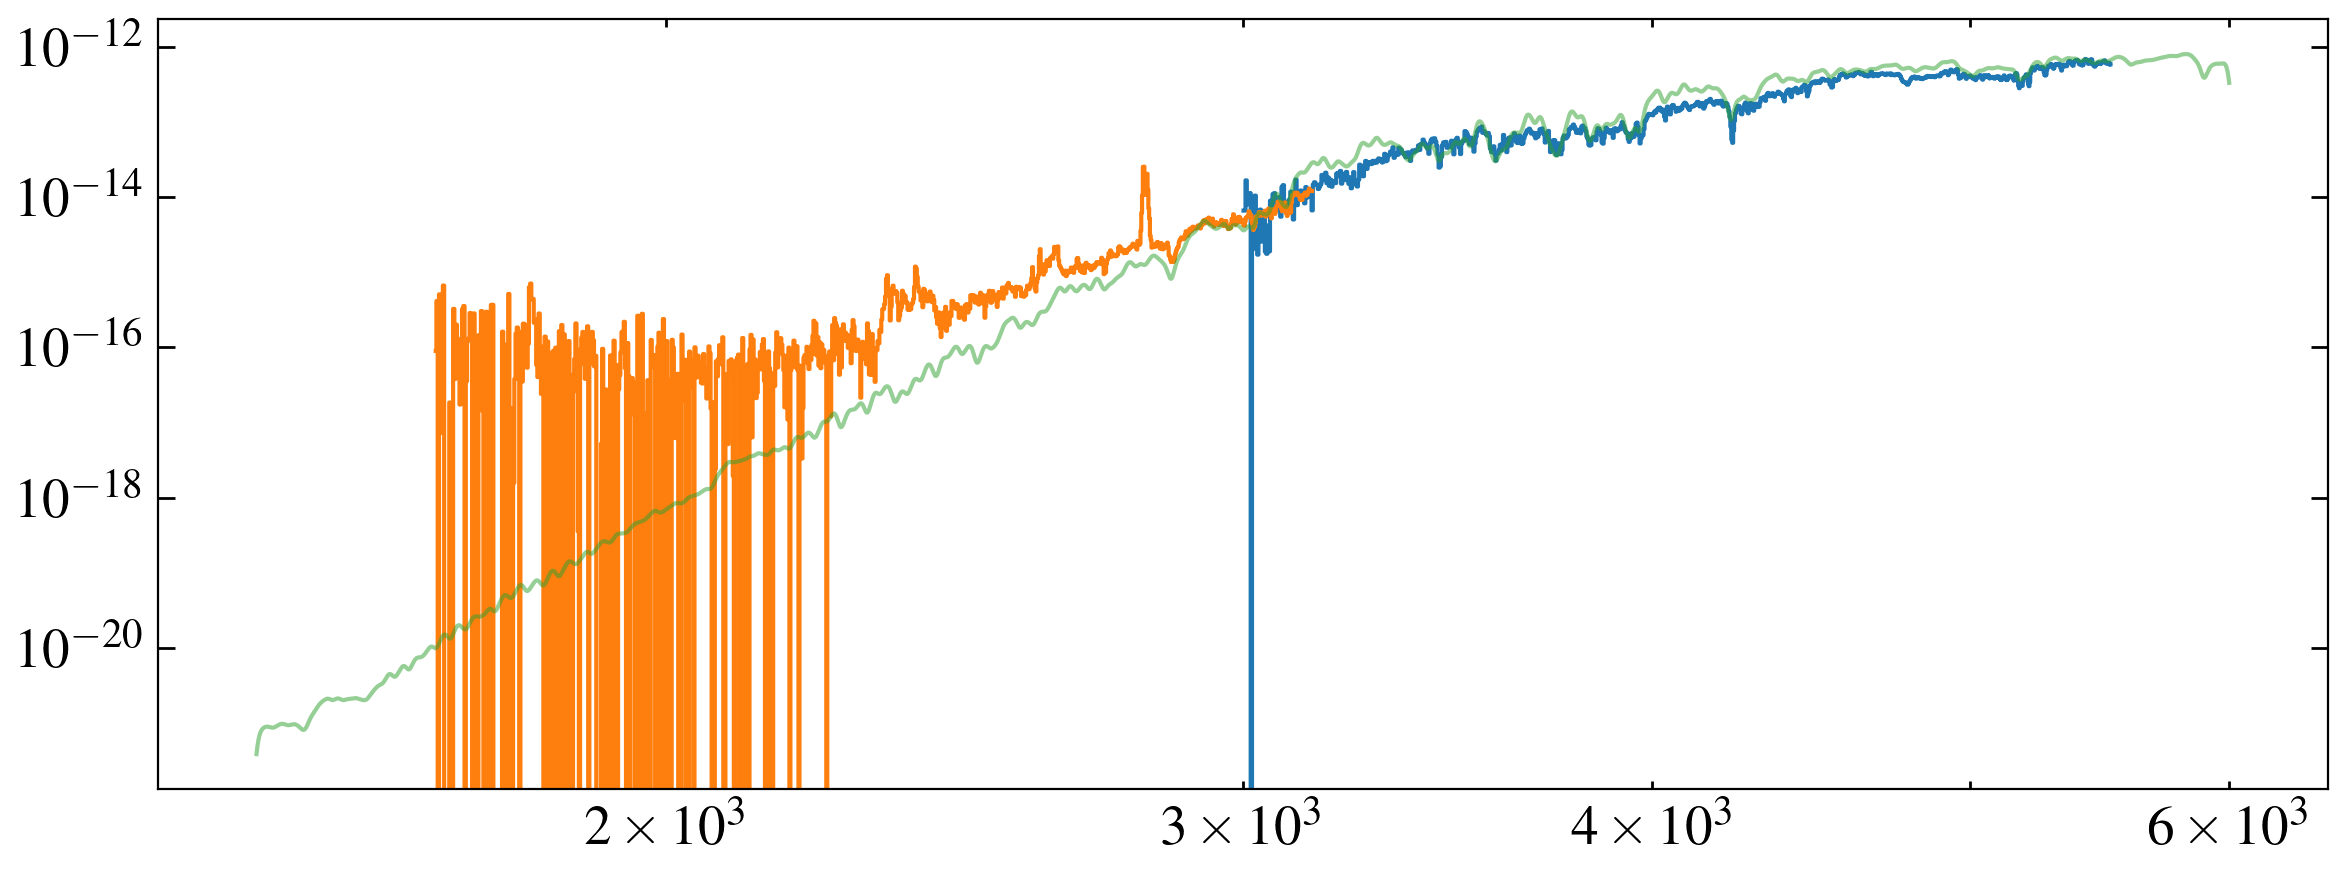

In [76]:
for x in [hlsp_x1ds[0], hlsp_x1ds[2]]:
    print(x)
    grating = fits.getheader(x, 0)['GRATING'] 
    data = fits.getdata(x, 1)
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
#     if grating in ['G140M', 'G140L']:
#         mask = (w > 1160)
        
        # plt.ylim(-1e-16, 1e-16)
        # plt.axhline(0, ls='--', c='0.5')
    if grating =='G230L':
        mask = (w > 1700) & (w < 3150)
    if grating =='G430L':
        mask = (w > 3000) & (w < 5520)
    
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
#     plt.step(w, e, where='mid')
#     plt.show()
   
pmask = (pw > 1500) & (pw < 6000)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi,500)
plt.plot(pwi, pfi, alpha=0.5)
    
plt.yscale('log')
plt.xscale('log')

PHX looks good.

In [85]:
import prepare_model
hdr = fits.getheader('draft_hlsp/gj_341/hlsp_muscles_hst_stis_gj_341_g140m_v1_component-spec.fits' , 0)
sed_data = Table(meta=hdr)


In [86]:
prepare_model.make_model_spectrum('models/GJ_341_phoenix_interpolated.ecsv', 1, sed_data,
                                  savepath = savepath, save_ecsv=False, save_fits=True, normfac=normfac.value, model_name='PHX')

Spectrum saved as hlsp_muscles_model_phx_gj_341_na_v1_component-spec.fits


In [82]:
lyapath = '/media/david/2tb_ext_hd/hddata/meats/lya/gj341/GJ341_LyA_MCMC_results.csv'
data = Table.read(lyapath)
# data.dtype.names

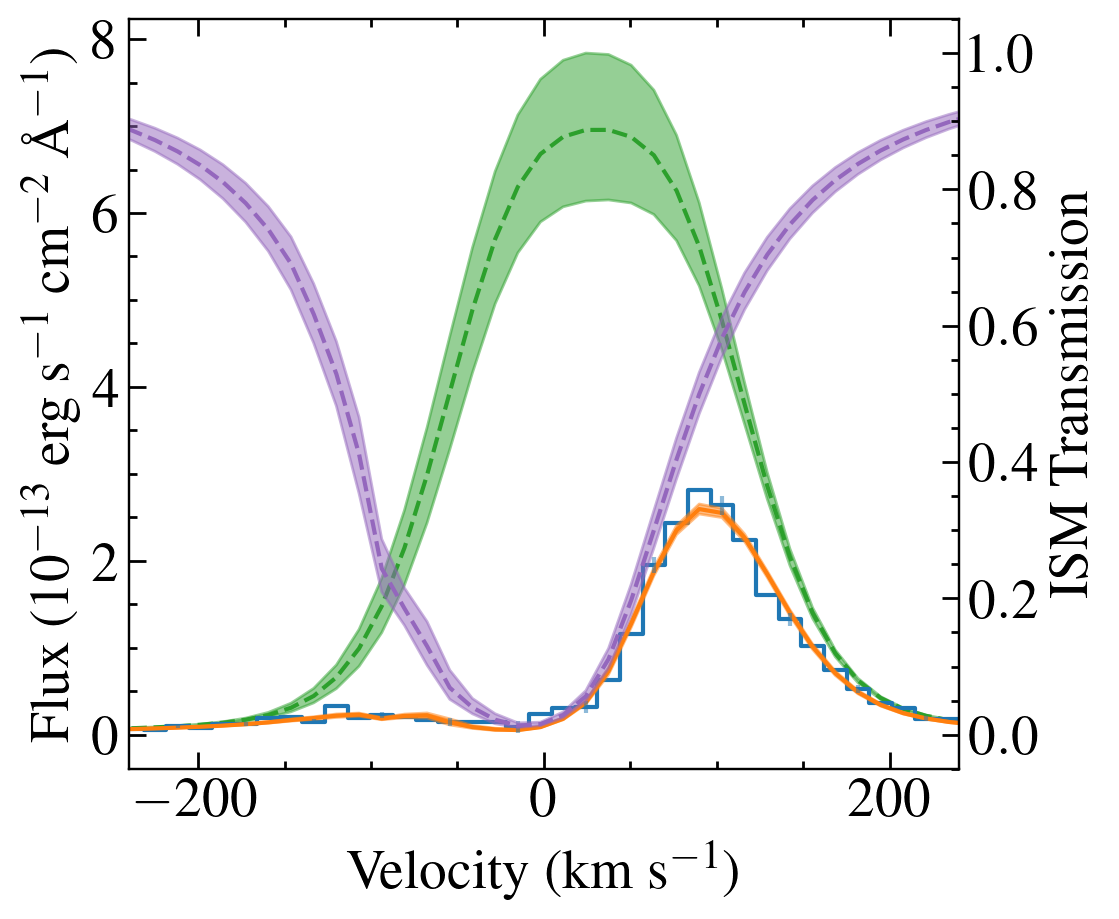

In [83]:
lya = 1215.67
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale

fig, ax= plt.subplots(figsize=(6,5))
v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
ax.step(v, data['flux_lya']*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
ax.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
ax.plot(v, data['lya_model_median']*fscale, c='C1', label='Model fit', zorder=1)
ax.fill_between(v.value, data['lya_model_high_1sig']*fscale,data['lya_model_low_1sig']*fscale, color='C1', alpha=0.5)

ax.plot(v, data['lya_intrinsic_median']*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
ax.fill_between(v.value, data['lya_intrinsic_high_1sig']*fscale,data['lya_intrinsic_low_1sig']*fscale, color='C2', alpha=0.5, zorder=-10)

# name = os.path.split(spec)[1][:-34]
# ax.set_title(name, size=20)

# xlim = min([abs(min(v.value)), max(v.value)])-10
xlim = 240
ax.set_xlim(-xlim, xlim)
ax2=ax.twinx()
ax2.plot(v, data['lya_ism_median'], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
ax2.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C4', alpha=0.5, zorder=-10)
ax2.set_ylim(-0.05, 1.05)
ax2.set_ylabel('ISM Transmission')


ax.set_xlabel('Velocity (km s$^{-1}$)', size=20)
ax.set_ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)

fig.tight_layout()

# fig.savefig('plots/toi-776_lya.pdf')

In [87]:
lw, lf, le = data['wave_lya'], data['lya_intrinsic_median'], np.mean([data['lya_intrinsic_high_1sig']-data['lya_intrinsic_median'], data['lya_intrinsic_median']-data['lya_intrinsic_low_1sig']], axis=0)
lyatab = Table([lw, lf, le], names=['WAVELENGTH', 'FLUX', 'ERROR'])
lyatab.write('models/gj341_lya.ecsv', overwrite=True)

prepare_model.make_model_spectrum('models/gj341_lya.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1, model_name='lya')


Spectrum saved as hlsp_muscles_model_lya_gj_341_na_v1_component-spec.fits


In [96]:
prepare_model.make_model_spectrum('models/GJ341_apec_errs.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1.0, model_name='apec')

Spectrum saved as hlsp_muscles_model_apec_gj_341_na_v1_component-spec.fits


Need new linelist from Bella, then send to Girish for DEM